## 3.2 Assignment: Using Data to Improve MLB Attendance


### Introduction: Dodgers MLB Attendance Dataset, Summary, Initial Thoughts, Research Questions, & Analysis Plan

In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.

You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

The variables included in this dataset include:

* month
* day
* attend
* day_of_week
* temp
* skies
* day_night
* cap
* shirt
* fireworks
* bobblehead

From what I know and have learned about baseball (I have someone to whom I am quite close who is very knowledgeable about baseball, played for a good portion of his life, is well-versed in baseball analytics, etc.), as I think about this project and my project steps, the following comes to mind:

* Given that the Giants and the Snakes (Diamondbacks) are the Dodgers rival teams, there may be an uptick in attendance during those games.
    * The uptick in attendance may also be present in games where a divisional opponent is also present (any opponent that is in the Dodgers' division). 
    * The division teams include:
        * Rockies
        * Snakes (Diamondbacks)
        * Giants
        * Padres
* Promotional item games (those games in which a free promotional item is given out), may result in higher attendance (a "free" incentive for people to attend).
* Season opening day may accrue higher attendance as well.

The questions that I would like to ask/explore with respect to this dataset include:

* Which variables appear to have the greatest impact on attendance?
* Are there any variable combinations that have a high impact on attendance, versus just one single variable?
* Overall, which variables may be the best predictors for attendance outcomes?
* What type of model might be a good fit to assess and predict this, and how successful might that model be in terms of accuracy and recall?


My analysis plan for this assignment includes:

* Pulling in the data and completing any tranformations as needed.
* Completing an EDA on the data - both with descriptives and visualizations.
* Assessing variable relationships with correlations and visualizations.
* Creating an analysis on the data as it relates to "attend" being the target variable.
* Making an overall assessment of how the Dodgers might improve attendance of their games based on my analysis work.

In [1]:
## Import libraries.
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

#### 1. Load the dataset.

In [2]:
## Pull in/load the data.

dodgers_df = pd.read_csv(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC630\Data\dodgers-2022.csv")

## View the data.
dodgers_df.head(10)

month  day  attend day_of_week   opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday    Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday    Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday    Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday     Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday     Padres    57  Cloudy     Night  NO    NO   
5   APR   15   38359      Sunday     Padres    65  Clear        Day  NO    NO   
6   APR   23   26376      Monday     Braves    60  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday     Braves    63  Cloudy     Night  NO    NO   
8   APR   25   26345   Wednesday     Braves    64  Cloudy     Night  NO    NO   
9   APR   27   44807      Friday  Nationals    66  Clear      Night  NO    NO   

  fireworks bobblehead  
0        NO         NO  
1        NO         NO  
2        NO         NO  
3       YES         NO  
4        NO         NO  
5        NO         NO  
6        NO         NO  
7        NO         NO  
8        NO         NO  
9       YES         NO

#### 2. Check for any missing data.

In [3]:
## Check if any missing values exist within the dataset.
dodgers_df.isnull().values.any()

False

No missing values exist within this dataset, so I will not need to handle anything in that regard.

#### 3. Check for any values that may be incorrect, erroneous, in the wrong place, special characters/spacing, etc. In other words, find all unique entries to ensure no duplicates or errors.

In [4]:
## Use the .unique() function to identify any "odd-one-out" values.

print("Months:", dodgers_df['month'].unique())
print("Days of the Week:", dodgers_df['day_of_week'].unique())
print("Opponents:", dodgers_df['opponent'].unique())
print("Skies:", dodgers_df['skies'].unique())
print("Day or Night:", dodgers_df['day_night'].unique())
print("Cap Day:", dodgers_df['cap'].unique())
print("Shirt Day:", dodgers_df['shirt'].unique())
print("Fireworks:", dodgers_df['fireworks'].unique())
print("Bobbleheads:", dodgers_df['bobblehead'].unique())

Months: ['APR' 'MAY' 'JUN' 'JUL' 'AUG' 'SEP' 'OCT']
Days of the Week: ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
Opponents: ['Pirates' 'Padres' 'Braves' 'Nationals' 'Giants' 'Rockies' 'Snakes'
 'Cardinals' 'Astros' 'Brewers' 'Angels' 'White Sox' 'Mets' 'Reds'
 'Phillies' 'Cubs' 'Marlins']
Skies: ['Clear ' 'Cloudy']
Day or Night: ['Day' 'Night']
Cap Day: ['NO' 'YES']
Shirt Day: ['NO' 'YES']
Fireworks: ['NO' 'YES']
Bobbleheads: ['NO' 'YES']


From this, it looks as though:

* A space exists after "Clear" (a "Skies" variable value).
* The Arizona Diamondbacks are listed as the Snakes (their nickname).

#### 3. Handle any pertinent data transformations to prepare for EDA and analysis steps.

In [5]:
## Check variable types.
dodgers_df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

From the original dataset, three variables exist that have numeric data. From checking the data types, we can see that those variables (day, attend, and temp) are already registered as such (int64). The remaining variables are registered as object variables - I would like to convert these to categorical variables before I proceed with the rest of my analysis work.

In [6]:
## Convert any variables that require doing so (object to categorical).

for col in ['month', 'day_of_week', 'opponent', 'skies', 'day_night', 'cap',
           'shirt', 'fireworks', 'bobblehead']:
    dodgers_df[col] = dodgers_df[col].astype('category')

In [7]:
## Recheck data types.
dodgers_df.dtypes

month          category
day               int64
attend            int64
day_of_week    category
opponent       category
temp              int64
skies          category
day_night      category
cap            category
shirt          category
fireworks      category
bobblehead     category
dtype: object

#### 4. EDA: Complete descriptive statistics to find out more about the data.

In [8]:
## Dataframe dimensions.

print("The dimension of the table is: ",dodgers_df.shape)

The dimension of the table is:  (81, 12)


In [9]:
## Dataframe info.

dodgers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   month        81 non-null     category
 1   day          81 non-null     int64   
 2   attend       81 non-null     int64   
 3   day_of_week  81 non-null     category
 4   opponent     81 non-null     category
 5   temp         81 non-null     int64   
 6   skies        81 non-null     category
 7   day_night    81 non-null     category
 8   cap          81 non-null     category
 9   shirt        81 non-null     category
 10  fireworks    81 non-null     category
 11  bobblehead   81 non-null     category
dtypes: category(9), int64(3)
memory usage: 4.8 KB


In [10]:
## Dataframe information - describe.

dodgers_df.describe()

day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67.000000
50%    15.000000  40284.000000  73.000000
75%    25.000000  46588.000000  79.000000
max    31.000000  56000.000000  95.000000

#### 5. EDA: Overall distributions and correlations of the data.

To get an initial look at the data visually, I will first take a look at some preliminary histograms as well as some correlation heatmaps.

##### With dummy variable encoding:

In order to properly view some of the categorical data, I will want to use dummy encoding to "assign" those categorical values a numeric value.

In [11]:
## Encode all categorical variables so they can have an "assigned" numeric value.
## Create dummy variables for all of the categorical variables in the dodgers_df dataframe.

dodgersdf_dum = pd.get_dummies(dodgers_df, columns=['month', 'day_of_week', 'opponent', 'skies', 'day_night', 'cap',
           'shirt', 'fireworks', 'bobblehead'], drop_first=True)
dodgersdf_dum.head()

day  attend  temp  month_AUG  month_JUL  month_JUN  month_MAY  month_OCT  \
0   10   56000    67          0          0          0          0          0   
1   11   29729    58          0          0          0          0          0   
2   12   28328    57          0          0          0          0          0   
3   13   31601    54          0          0          0          0          0   
4   14   46549    57          0          0          0          0          0   

   month_SEP  day_of_week_Monday  ...  opponent_Reds  opponent_Rockies  \
0          0                   0  ...              0                 0   
1          0                   0  ...              0                 0   
2          0                   0  ...              0                 0   
3          0                   0  ...              0                 0   
4          0                   0  ...              0                 0   

   opponent_Snakes  opponent_White Sox  skies_Cloudy  day_night_Night  \
0                0                   0             0                0   
1                0                   0             1                1   
2                0                   0             1                1   
3                0                   0             1                1   
4                0                   0             1                1   

   cap_YES  shirt_YES  fireworks_YES  bobblehead_YES  
0        0          0              0               0  
1        0          0              0               0  
2        0          0              0               0  
3        0          0              1               0  
4        0          0              0               0  

[5 rows x 37 columns]

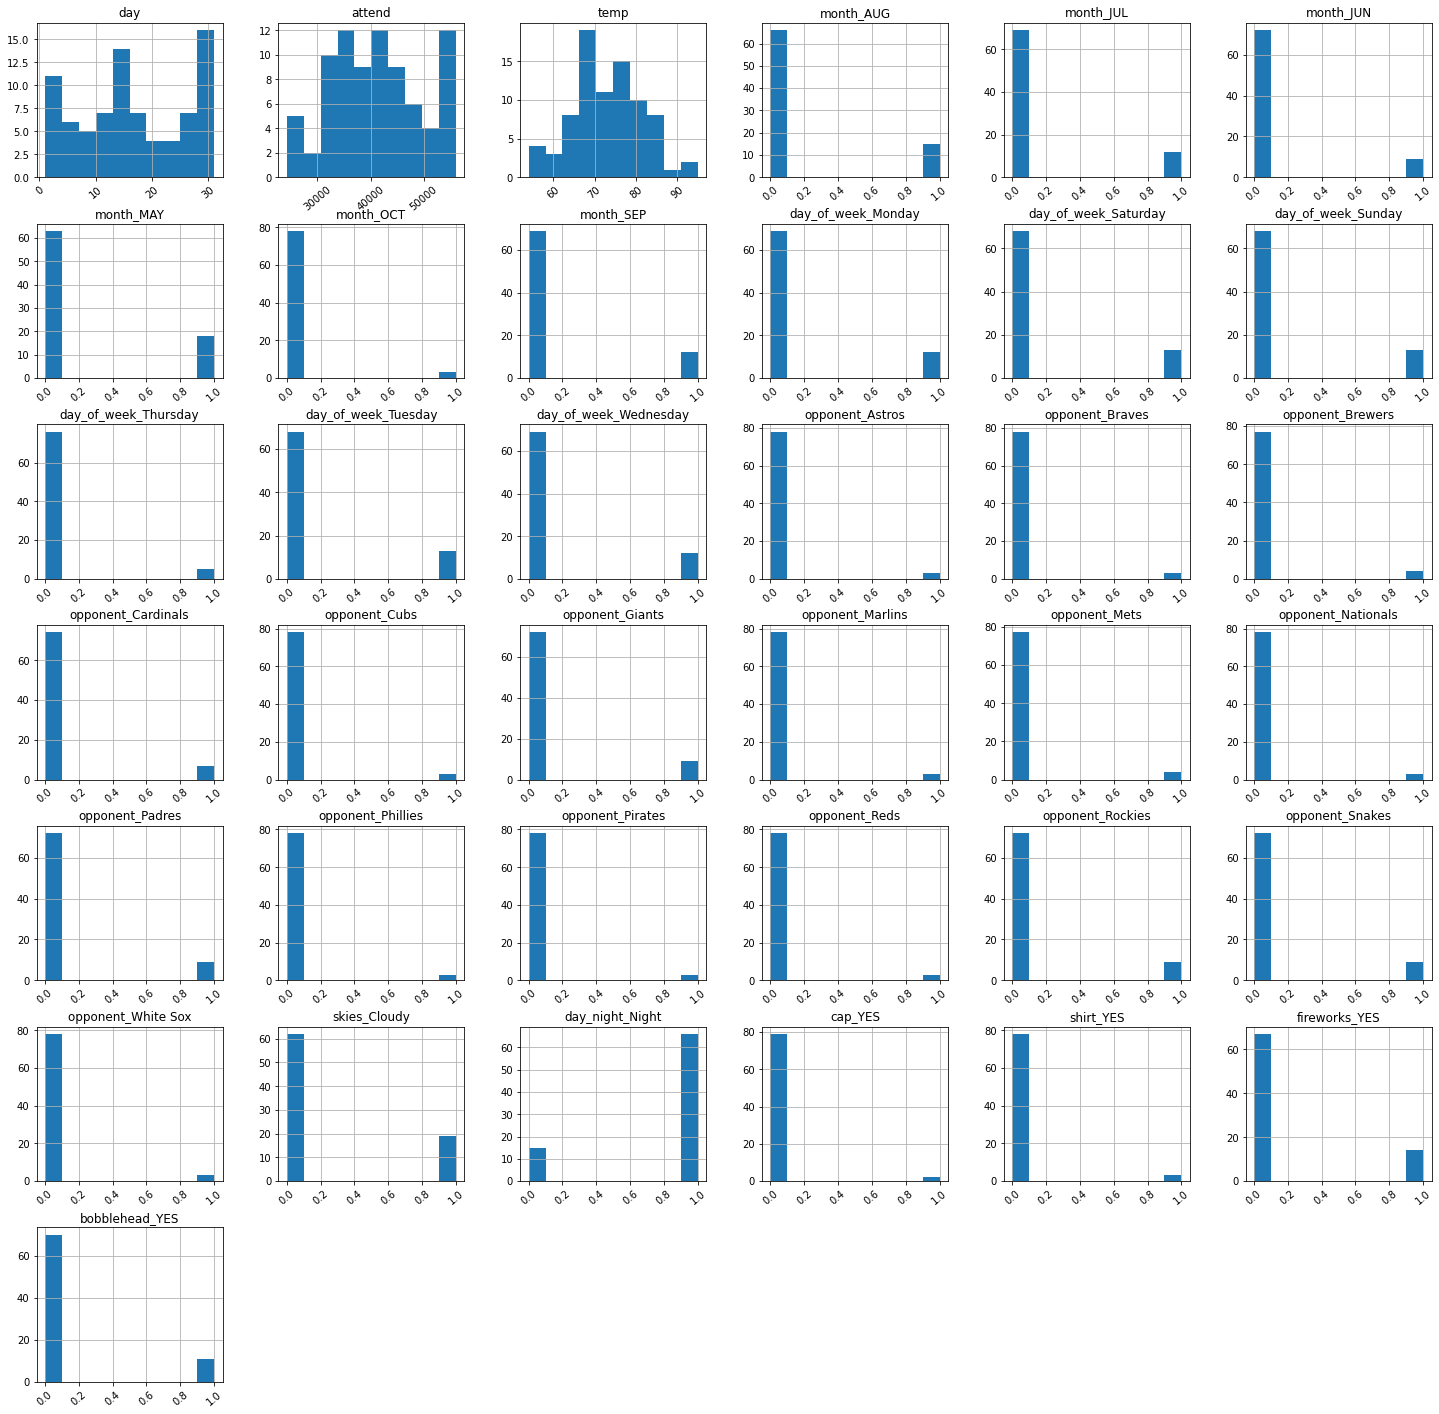

In [12]:
## Histograms/distributions for all variables.
## Plotting distribution for each of the numeric variables.
## sns.set(font_scale=1.12)
dodgersdf_dum.hist(figsize=(25,25), xrot=40)
plt.show()

The best variables to view from these preliminary histograms, of course, are the numeric variables. The day and attend histograms do not follow a normal curve, but the temp one does. The others are categorical, so we can see the distributions of either 0 or 1 from that. While these histograms give a basic distribution overview, they don't tell us much regarding what may impact attendance, so we will need to keep digging further.

C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_1240/3084123564.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("coolwarm").copy()
  color.set_bad('pink')


Text(0.5, 1.0, 'Correlation Matrix of Dodgers Game Attendance Variables')

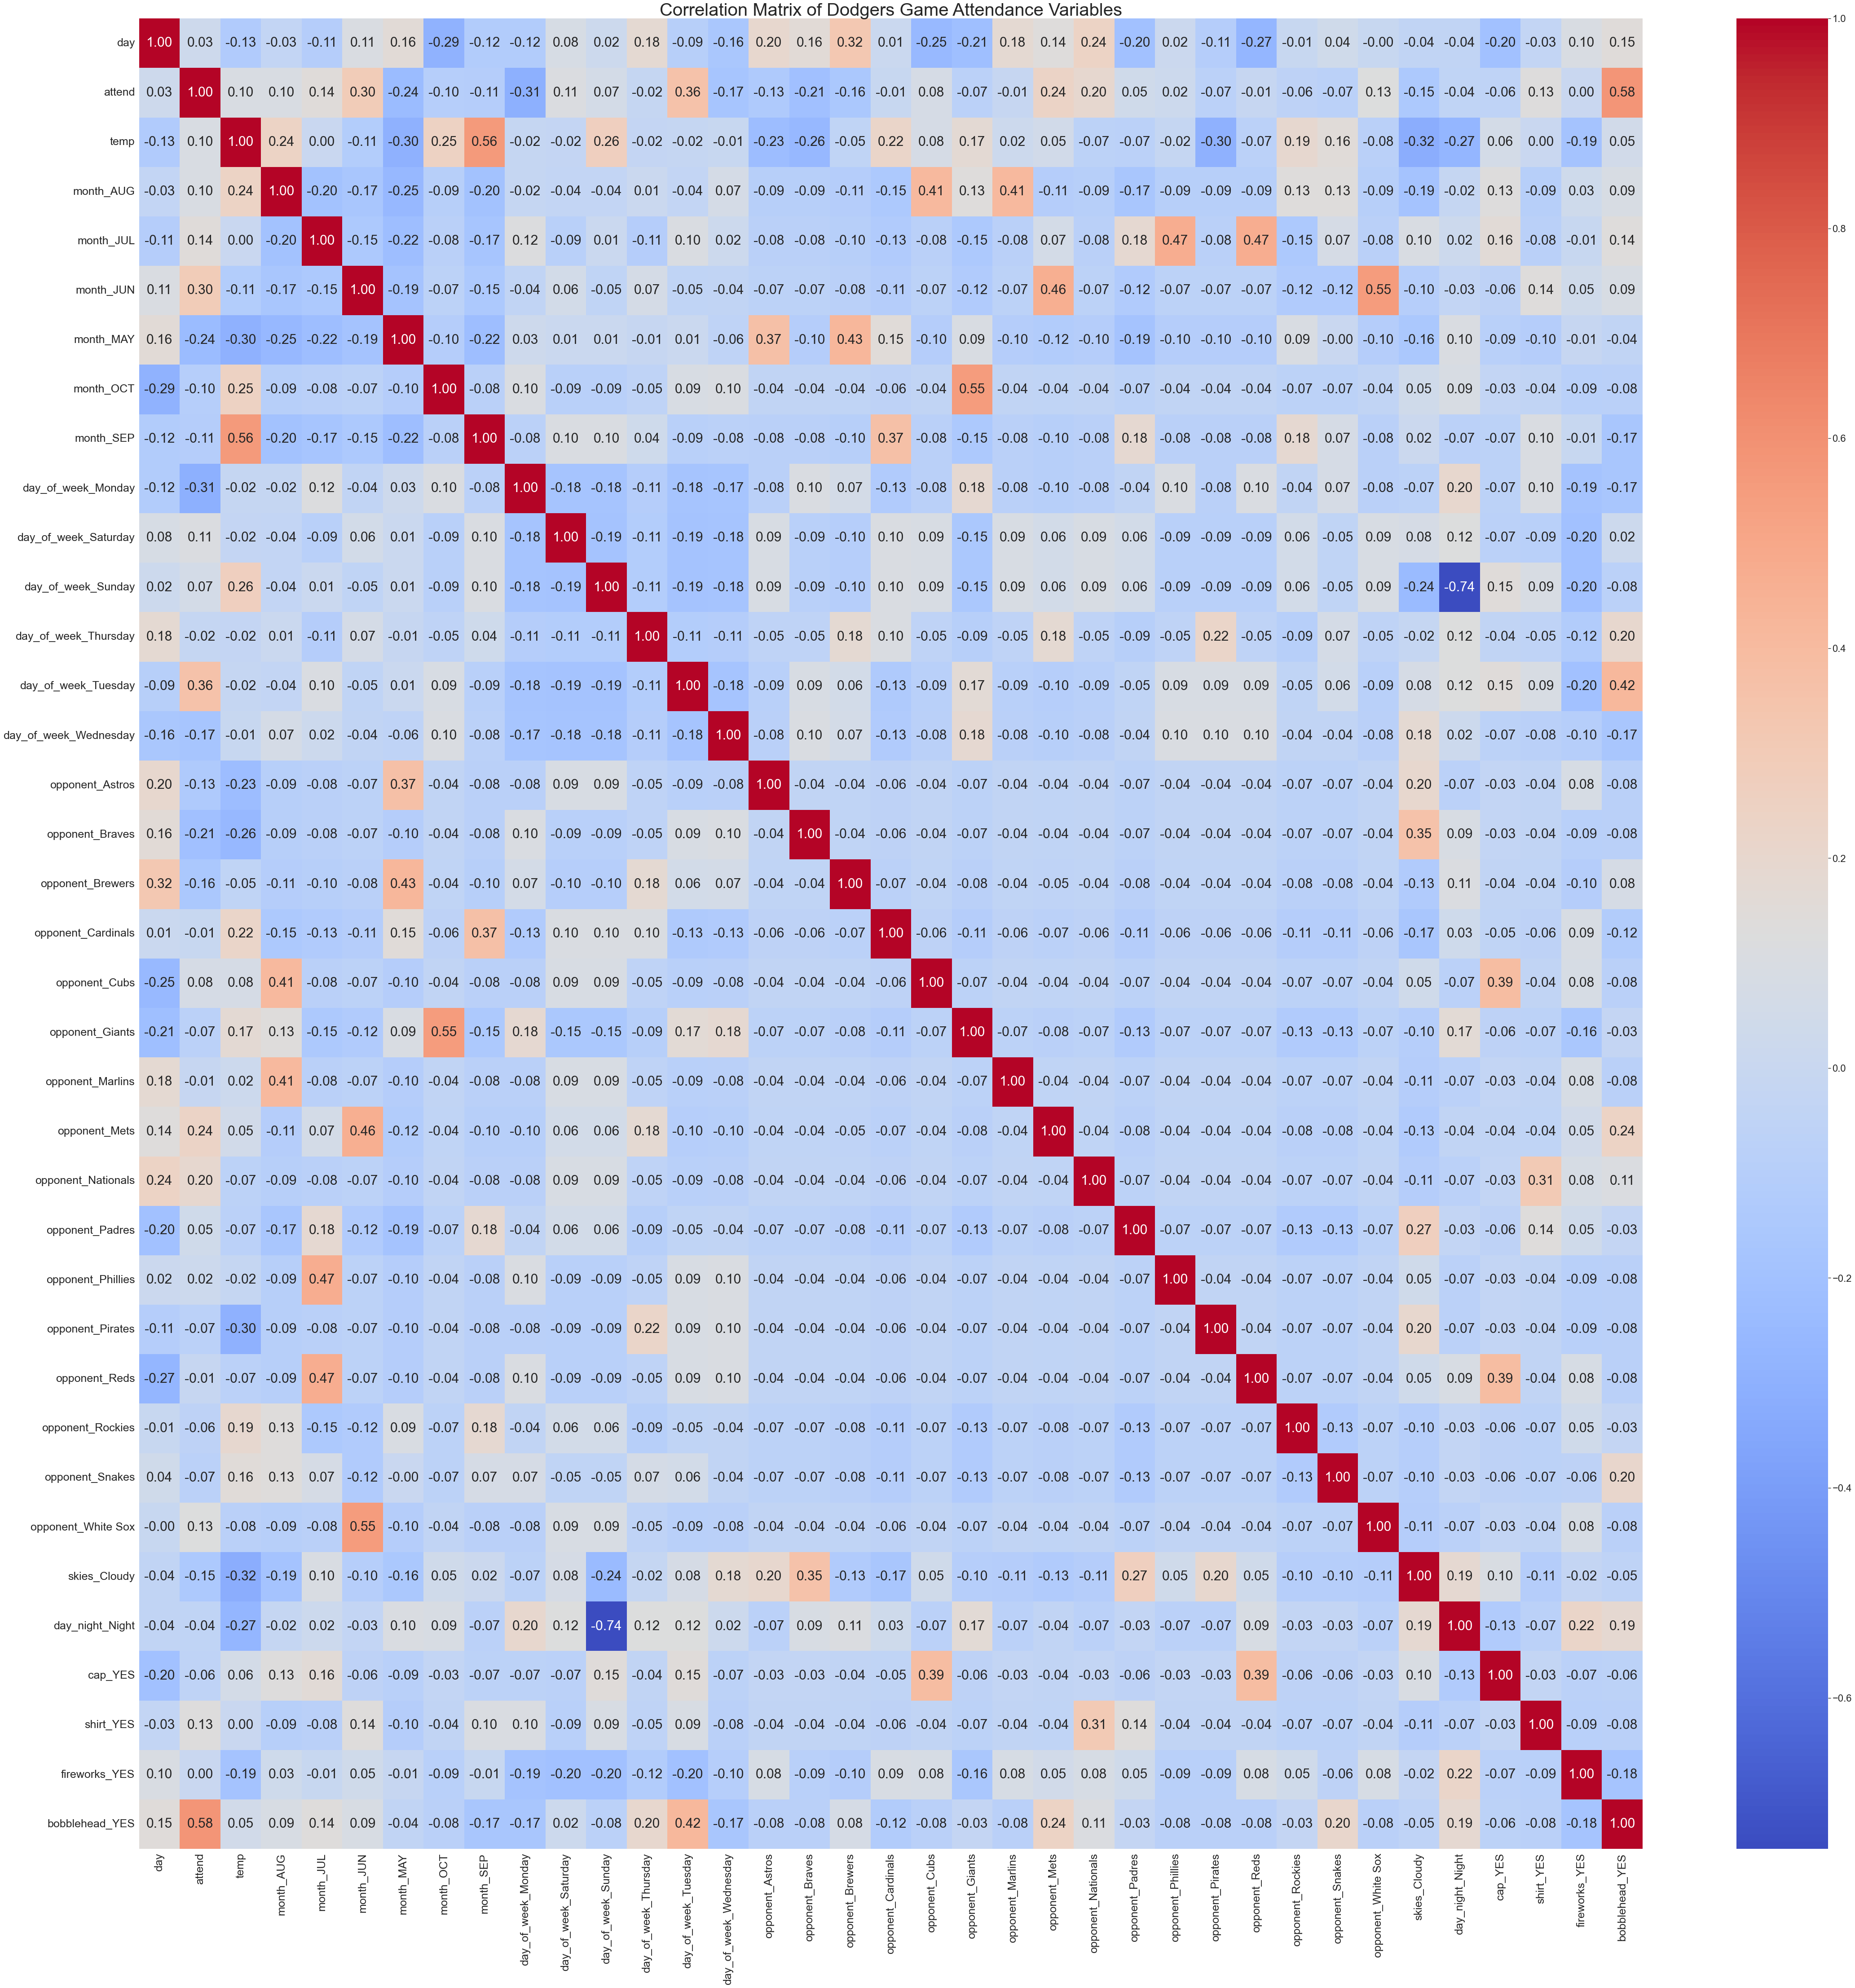

In [13]:
## Correlations/correlation heatmap of all variables (with dummy encoding).

## Plot the heatmap.
## Set color for potential bad values.
color = plt.get_cmap('coolwarm')   ## Default color.
color.set_bad('pink')
sns.set(font_scale=2.0)
plt.figure(figsize=(75, 75))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
corr_matrix = sns.heatmap(dodgersdf_dum.corr(), annot=True, cmap=color, annot_kws={"size":30}, fmt='.2f')
corr_matrix.set_title("Correlation Matrix of Dodgers Game Attendance Variables", fontsize = 40)

Overall, this correlation heatmap with the dummy variables is not the most helpful in terms of assessing relationships. From this, it appears that we can ascertain the following:

* Not many strong relationships exist overall.
* There is a moderately strong, positive relationship between a bobblehead promo and attendance (0.58).
* It appears as though there are not as many night games on Sundays, as that is strongly, negatively correlated at -0.74 (night games and Sunday as day of the week).
* There are some moderately strong, positive correlations between certain opponent teams and certain months - this makes sense, given that certain teams are probably scheduled to play against the Dodgers during certain months.

##### Without dummy variable encoding (alternative encoding method):

As an alternative method, I wanted to attempt the same EDA as above, but this time without dummy encoding and by simply using my own encoding system. Of course, this comes with its own caveats, so please refer to the overall explanation of these two EDA steps after this section.

In [14]:
## An alternative to dummy variables.

## Convert categorical variables by encoding them with "my own" numeric values for correlation.
cat_nums = {"month":     {'APR': 4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10},
                "day_of_week": {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5,
                                 'Friday':6, 'Saturday':7},
                "opponent": {'Pirates':1, 'Padres':2, 'Braves':3, 'Nationals':4, 'Giants':5, 'Rockies':6, 'Snakes':7,
                             'Cardinals':8, 'Astros':9, 'Brewers':10, 'Angels':11, 'White Sox':12, 'Mets':13,
                             'Reds':14, 'Phillies':15, 'Cubs':16, 'Marlins':17},
                "skies": {'Clear ':0, 'Cloudy':1},
                "day_night": {'Day':0, 'Night':1},
                "cap": {'NO':0, 'YES':1},
                "shirt": {'NO':0, 'YES':1},
                "fireworks": {'NO':0, 'YES':1},
                "bobblehead": {'NO':0, 'YES':1}}

## Make a copy of the dataframe.
dodgersdf_num = dodgers_df.copy()

## Replace the values to those defined/adjusted above.
dodgersdf_num.replace(cat_nums, inplace=True)
dodgersdf_num.head()

month  day  attend  day_of_week  opponent  temp  skies  day_night  cap  \
0      4   10   56000            3         1    67      0          0    0   
1      4   11   29729            4         1    58      1          1    0   
2      4   12   28328            5         1    57      1          1    0   
3      4   13   31601            6         2    54      1          1    0   
4      4   14   46549            7         2    57      1          1    0   

   shirt  fireworks  bobblehead  
0      0          0           0  
1      0          0           0  
2      0          0           0  
3      0          1           0  
4      0          0           0

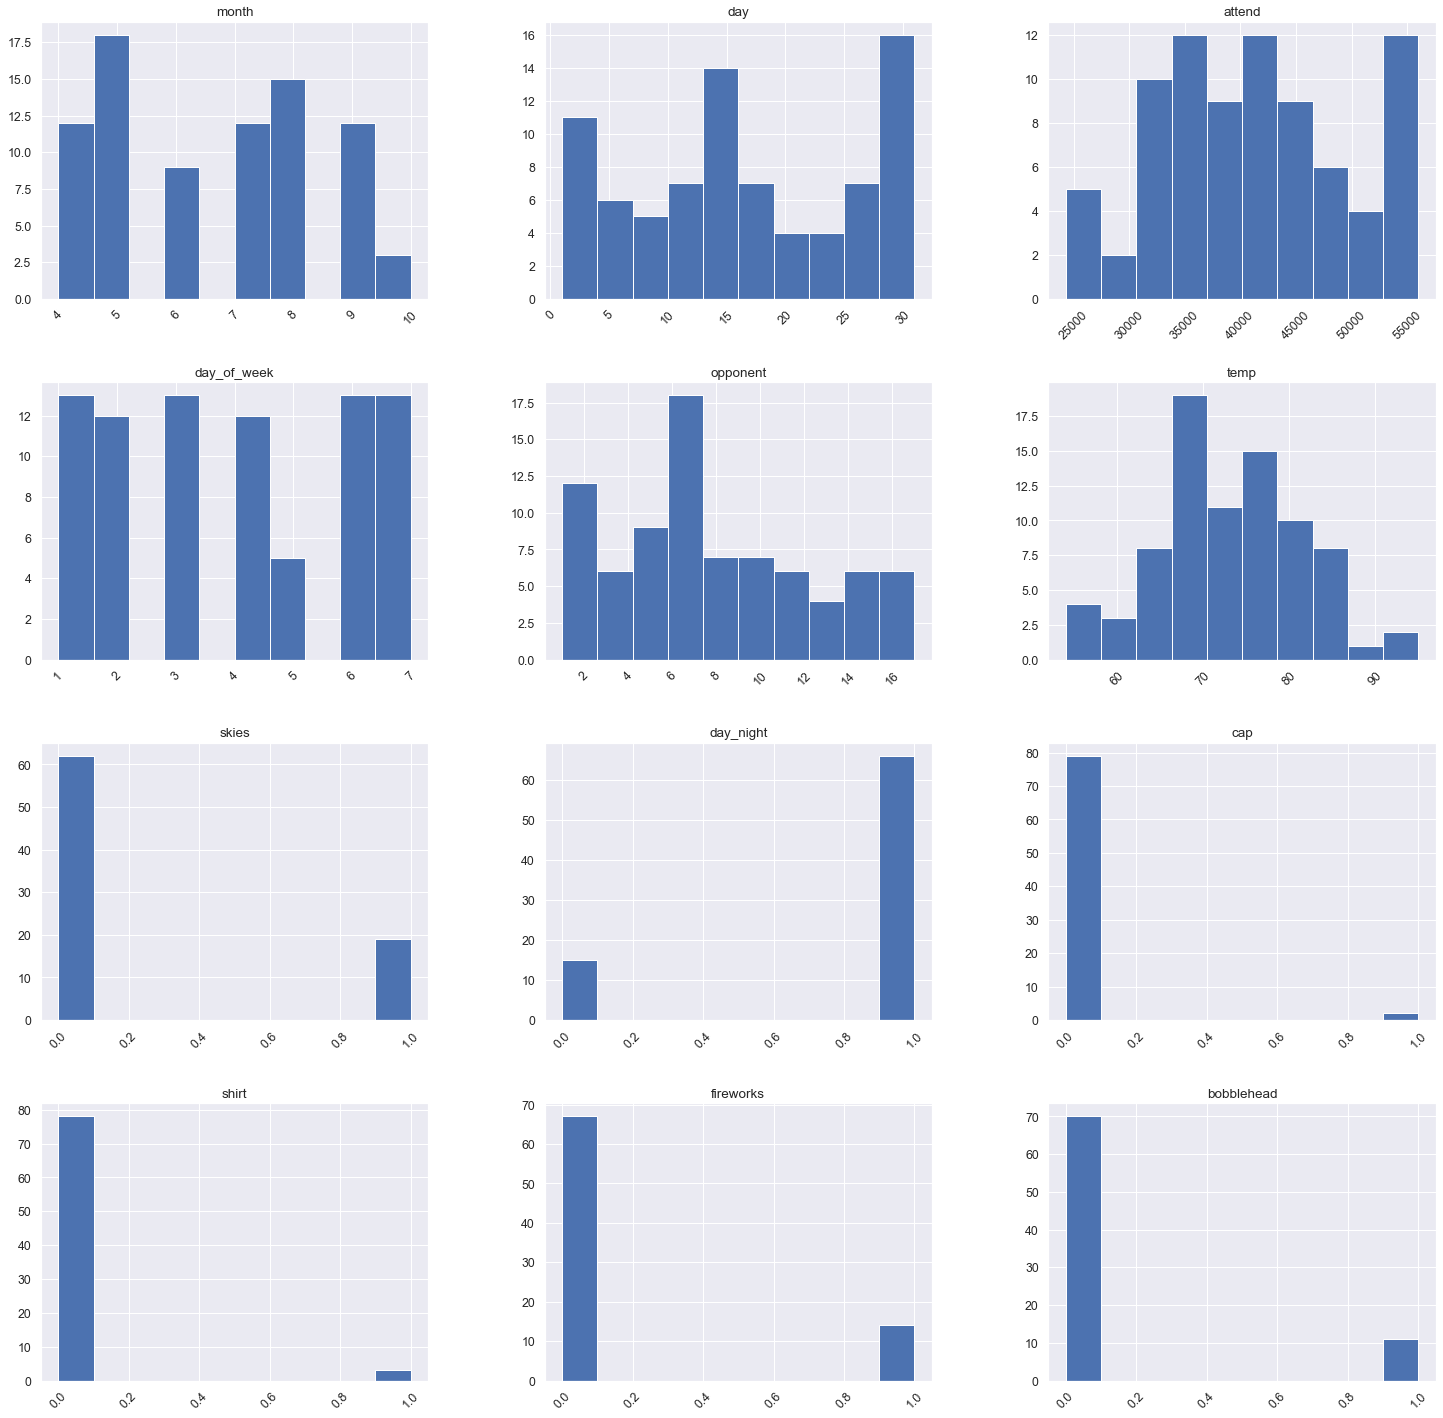

In [15]:
## Histograms/distributions for all variables.
## Plotting distribution for each of the numeric variables.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.12)
dodgersdf_num.hist(figsize=(25,25), xrot=45)
plt.show()

In these histograms, we are able to a bit better representation of some of the other categorical variables. In the first set with dummy variables, it was somewhat tough for the "human eye" to really ascertain what was taking place. Here, we can see a bit more, including for week days, opponents, and temp.

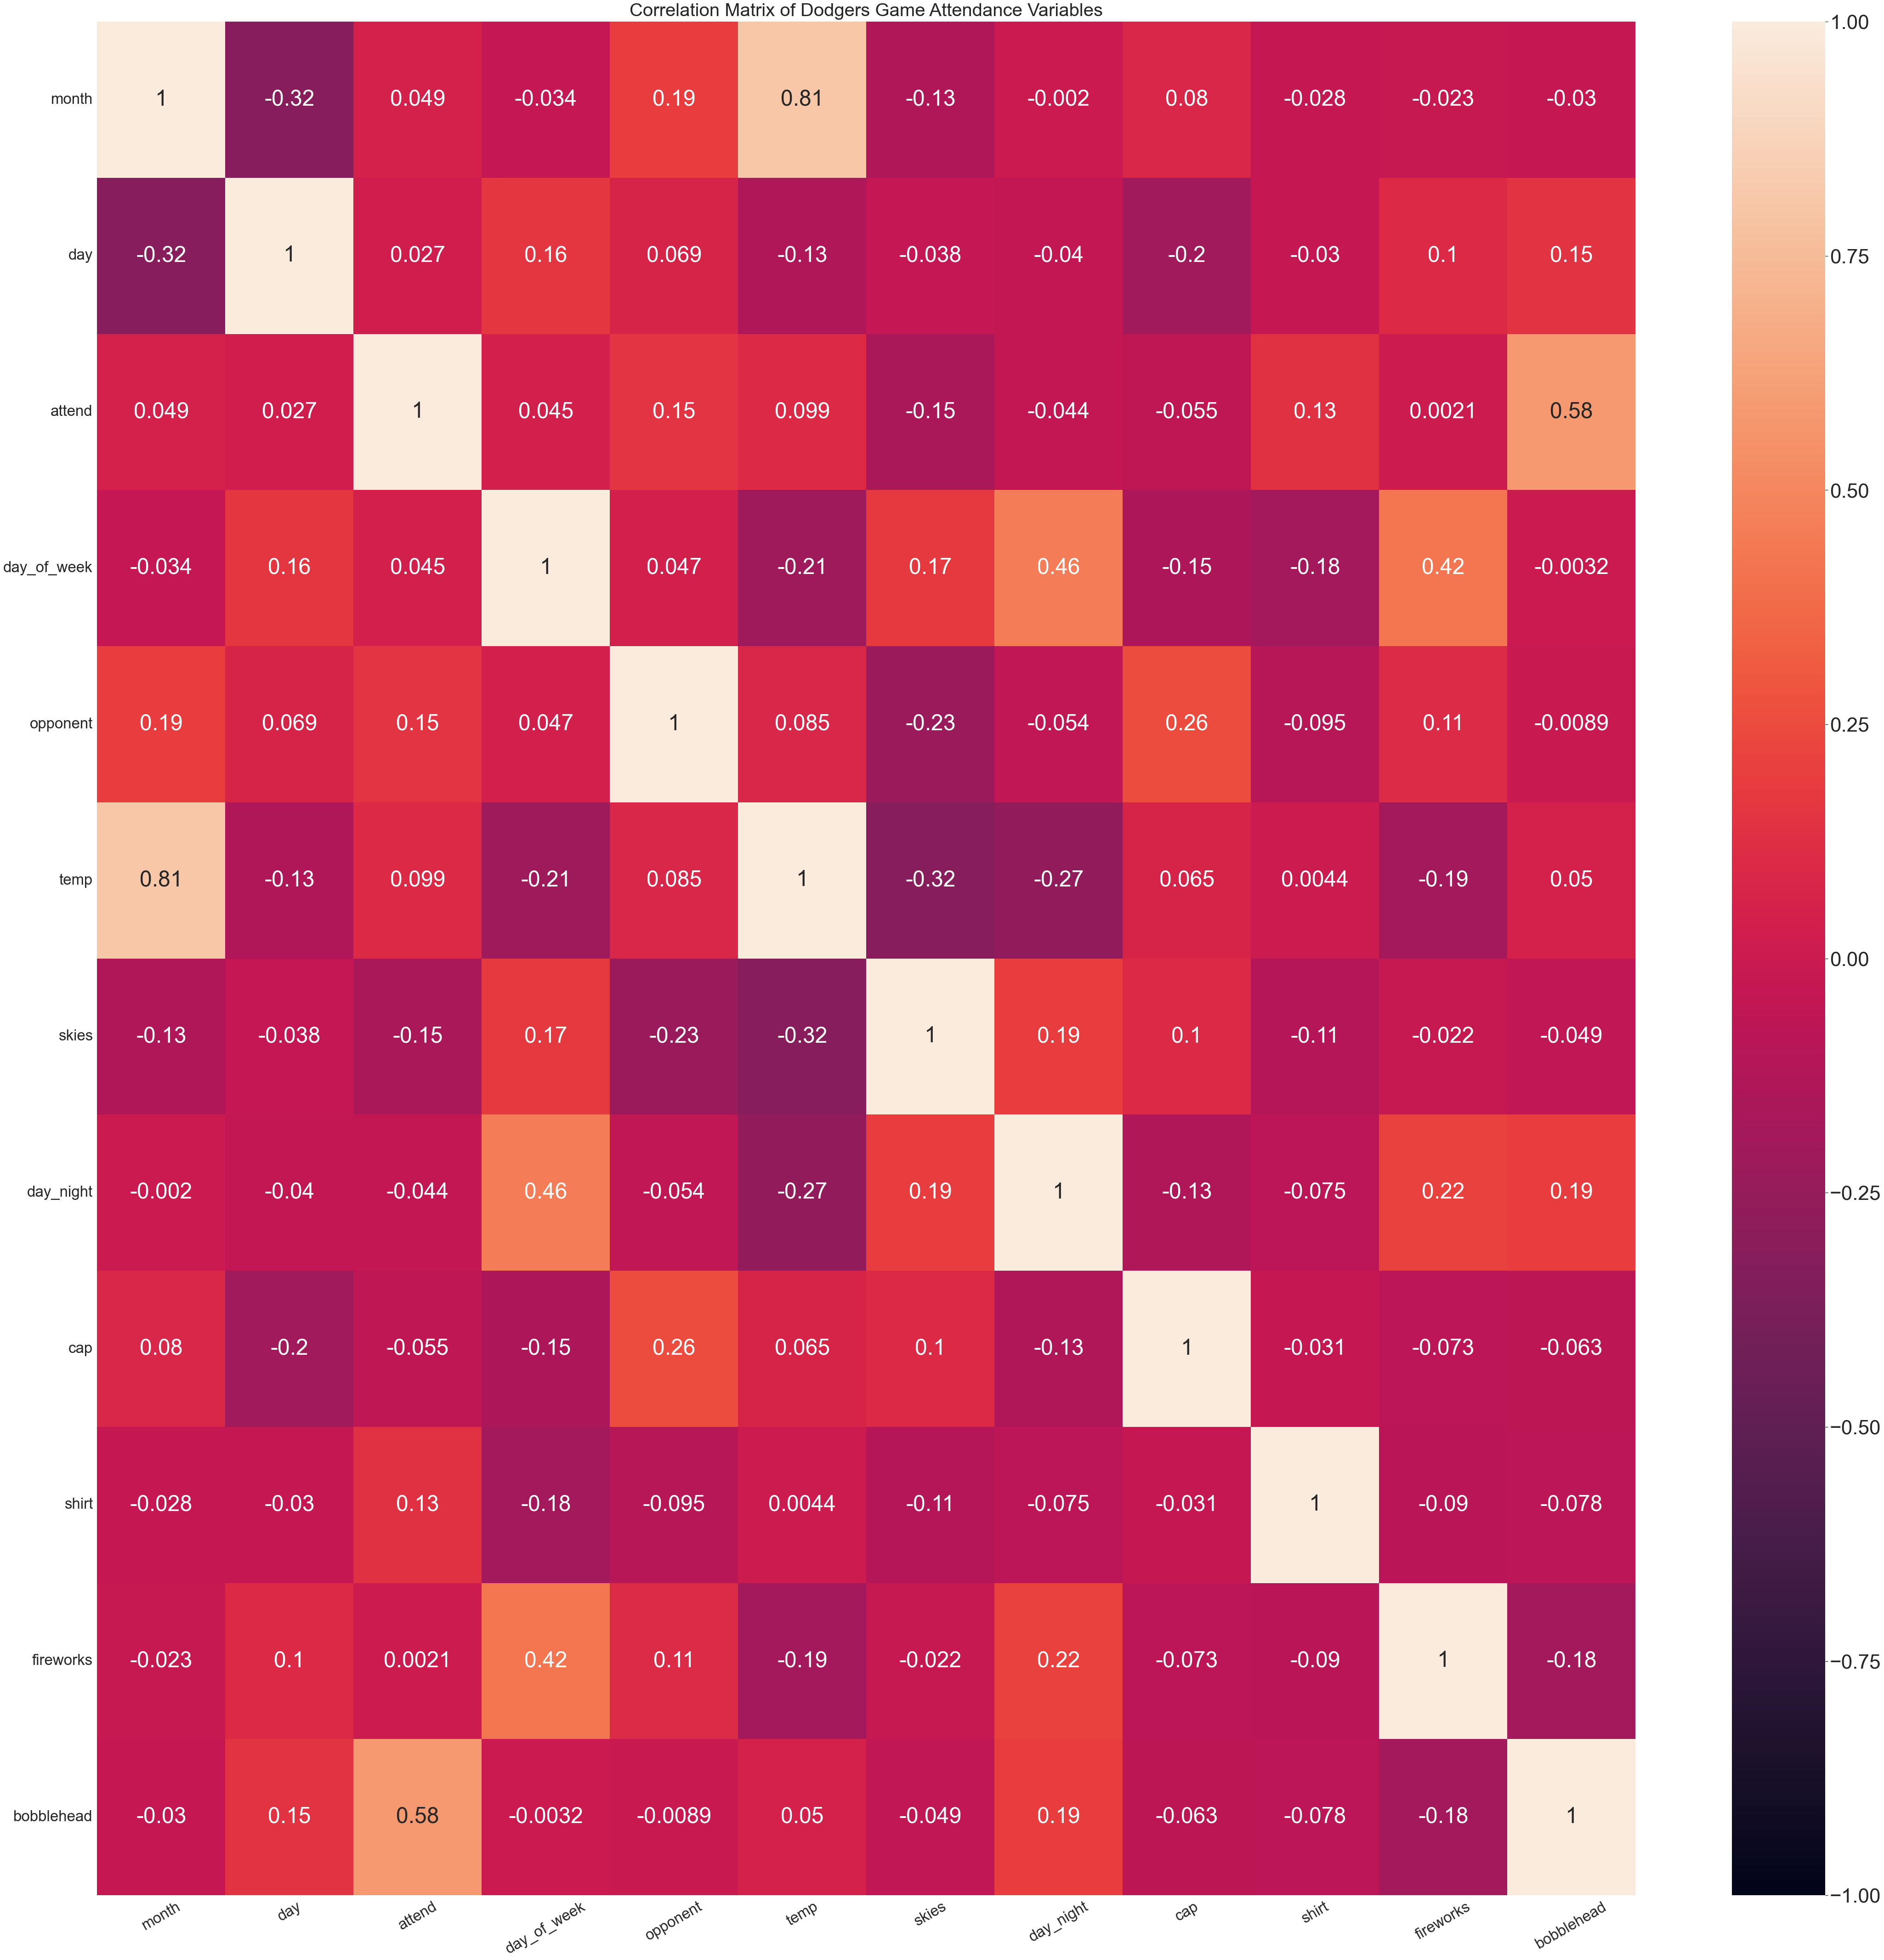

In [16]:
## Plot a seaborn correlation heatmap.

sns.set(font_scale=4.0)
plt.figure(figsize=(75, 75))
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
sns.heatmap(dodgersdf_num.corr(), vmin = -1, vmax =1, annot = True)
plt.title('Correlation Matrix of Dodgers Game Attendance Variables', fontdict={'fontsize':40}, pad=12)
## corr_matrix.set_title("Correlation Matrix of Dodgers Game Attendance Variables", fontsize = 40)
plt.yticks(rotation = 0)
plt.xticks(rotation = 30)
plt.show()

In this correlation heatmap, we can see marked differences from the first one with the dummy variables. This one is also easier to view/interpret, but overall, I think that using either of these correlation heatmaps would be mainly ineffective and inconclusive as it relates to assessing what influences attendance.

More specifically, after some additional research, I wanted to call out the following as a part of my assessment and interpretation, because I feel it is important to do so from both theoretical and applicability standpoints:
* First, I realize the importance of dummy variables - these are necessary because not only do they encode categorical variables, but they control for/address multi-collinearity by "dropping" one of the categories. This is helpful in ascertaining whether or not variables have a relationship with one another, which could potentially impact any target variable relationships. (This helps to combat the dummy variable trap).
* Secondly, there are some issues with creating a simple correlation heatmap between categorical and numerical variables. This is because a Correlation Ratio is a better fit/solution for assessing multiple categorical variables with multiple numerical variables. Given this, perhaps some consideration should be given to Cramer's V, the Correlation Ratio, and Theil's U. 
* Overall, for the question I am mainly trying to answer (what recommendations do I have for increasing attendance?) dealing with a correlation heatmap matrix appears to be overly complicated, with not enough helpful or meaningful information. I believe simpler EDA assessments exist, which I will explore as well.
* Given that dummy variables are better for multi-collinearity purposes than my own encoded values, and given that the Correlation Ratio is likely a better solution than the correlation heatmaps above (dummy variables or otherwise), I don't conclusively feel confident in either of these results.
* After these EDA assessments, I feel it imperative to continue on with other, more meaningful EDA assessments, which will take place in the next step.


References/resources consulted for this portion:
* https://www.kaggle.com/code/tsilveira/applying-heatmaps-for-categorical-data-analysis/notebook
	
* https://github.com/shakedzy/dython/issues/2
	
* https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

* https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707
 
* https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde


#### 6. EDA: Explore attendance distributions.

In order to use this data to make a recommendation to management on how to improve attendance, it will first be imperative for me to explore the attendance distributions to get a better understanding of Dodgers game attendance and what that looks from various perspectives within the data.

##### Attendance by date:

In [17]:
## Pastel color theme.
sns.set_palette("pastel")

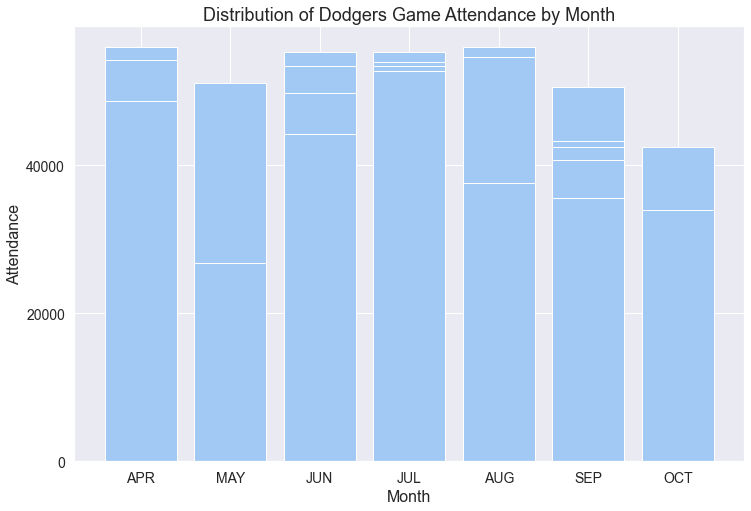

In [18]:
## Plot a bar graph to assess attendance counts per each month.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['month'],dodgers_df['attend'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.title('Distribution of Dodgers Game Attendance by Month', fontsize=18)
## plt.grid(False)
plt.show()

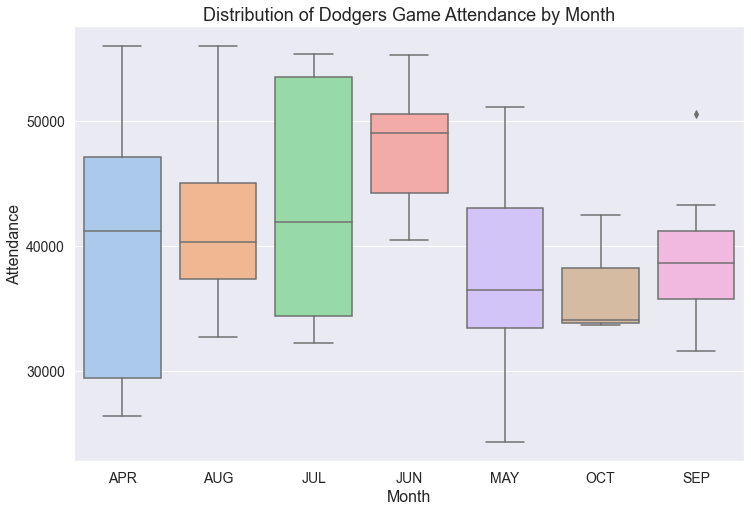

In [19]:
## Plot a box plot of the same data above (monthly attendance).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'month', y = 'attend', data = dodgers_df)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.title('Distribution of Dodgers Game Attendance by Month', fontsize=18)
plt.show()

In [20]:
## Describe the data values by month.

dodgers_df.groupby('month').attend.describe().sort_values('mean')

count          mean           std      min       25%      50%  \
month                                                                  
OCT      3.0  36703.666667   5000.193030  33624.0  33819.00  34014.0   
MAY     18.0  37345.722222   7721.822307  24312.0  33413.25  36422.0   
SEP     12.0  38955.083333   5135.247758  31607.0  35717.25  38650.0   
APR     12.0  39591.916667  10882.001583  26345.0  29378.75  41186.5   
AUG     15.0  42751.533333   7256.695921  32659.0  37353.00  40284.0   
JUL     12.0  43884.250000   9399.324716  32238.0  34340.75  41914.0   
JUN      9.0  47940.444444   4919.203063  40432.0  44217.00  49006.0   

            75%      max  
month                     
OCT    38243.50  42473.0  
MAY    43011.25  51137.0  
SEP    41155.25  50560.0  
APR    47100.00  56000.0  
AUG    45062.50  56000.0  
JUL    53516.00  55359.0  
JUN    50559.00  55279.0

* The month with the highest average attendance was June - with not much variance in attendance numbers. 
* The highest overall attendance was in April, but the month of April experienced a lot of overall variance in attendance numbers throughout the month.

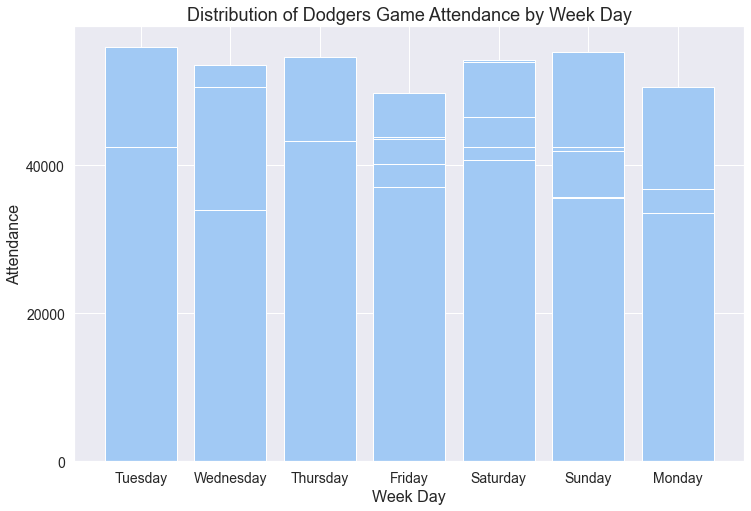

In [21]:
## Plot a bar graph to assess attendance counts per each day of the week.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['day_of_week'],dodgers_df['attend'])
plt.xlabel('Week Day', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Week Day', fontsize=18)
plt.show()

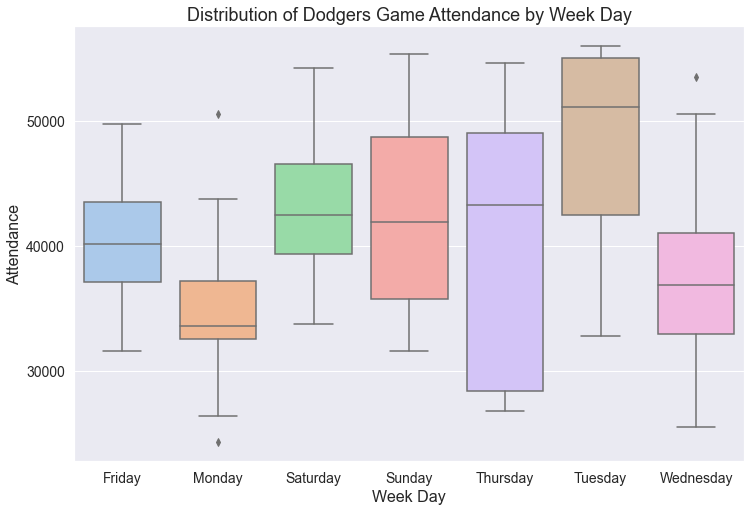

In [22]:
## Plot a box plot of the same data above (week day attendance).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'day_of_week', y = 'attend', data = dodgers_df)
plt.xlabel('Week Day', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Week Day', fontsize=18)
plt.show()

In [23]:
## Describe the data values by day of week.

dodgers_df.groupby('day_of_week').attend.describe().sort_values('mean')

count          mean           std      min       25%      50%  \
day_of_week                                                                  
Monday        12.0  34965.666667   7005.957949  24312.0  32553.75  33582.0   
Wednesday     12.0  37585.166667   8696.234889  25509.0  32927.00  36840.0   
Friday        13.0  40116.923077   4694.879400  31601.0  37133.00  40167.0   
Thursday       5.0  40407.400000  12411.591328  26773.0  28328.00  43309.0   
Sunday        13.0  42268.846154   7596.350657  31607.0  35754.00  41907.0   
Saturday      13.0  43072.923077   6336.482298  33735.0  39383.00  42449.0   
Tuesday       13.0  47741.230769   8291.390044  32799.0  42473.00  51137.0   

                  75%      max  
day_of_week                     
Monday       37162.50  50559.0  
Wednesday    41003.25  53570.0  
Friday       43537.00  49763.0  
Thursday     49006.00  54621.0  
Sunday       48753.00  55359.0  
Saturday     46549.00  54242.0  
Tuesday      55024.00  56000.0

* Overall, Tuesdays saw the largest attendance. 
* Tuesdays also have the largest average attendance.

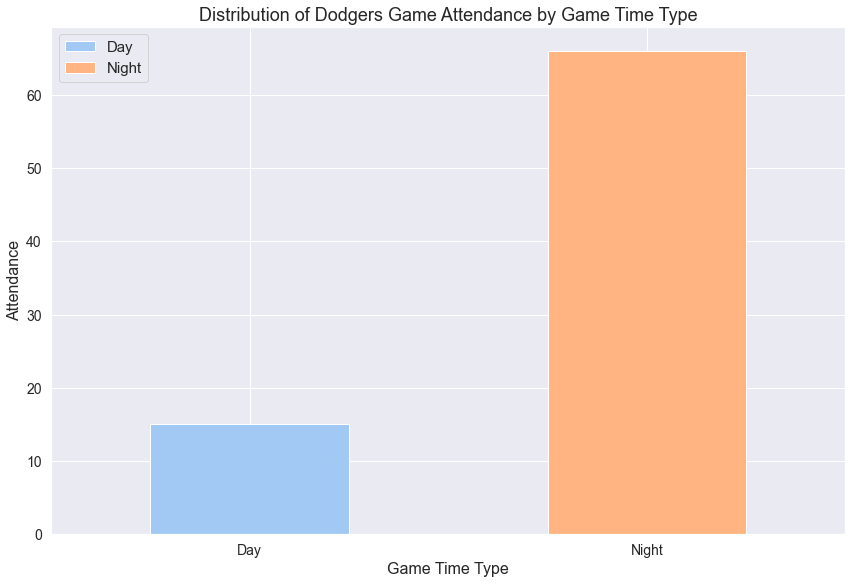

In [24]:
## Plot a bar graph to assess attendance counts by time of day (day vs. night).

## plt.figure(figsize=(16, 12))
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_palette("pastel")
time = dodgers_df.day_night
dodgers_df.groupby(["day_night", time]).size().unstack(level=1).plot.bar(stacked=True)
## plt.bar(dodgers_df['day_night'],dodgers_df['attend'])
plt.xlabel('Game Time Type', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper left', prop={'size': 15})
plt.tight_layout()
plt.title('Distribution of Dodgers Game Attendance by Game Time Type', fontsize=18)
plt.show()

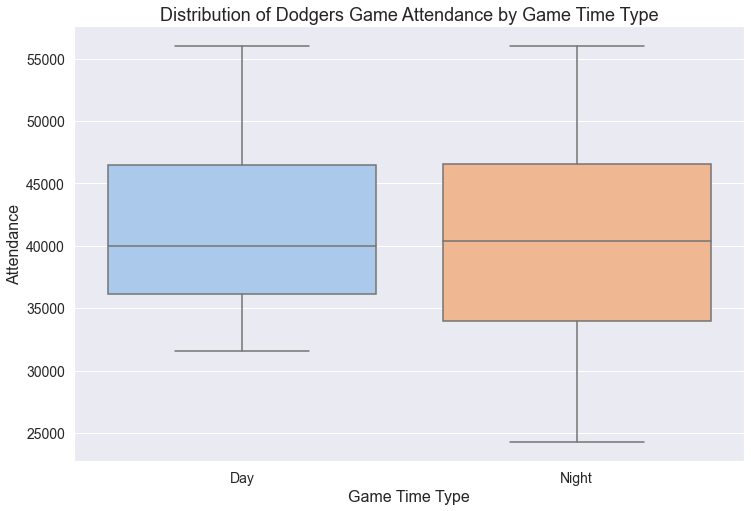

In [25]:
## Plot a box plot of the same data above (day vs. night).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'day_night', y = 'attend', data = dodgers_df)
plt.xlabel('Game Time Type', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Game Time Type', fontsize=18)
plt.show()

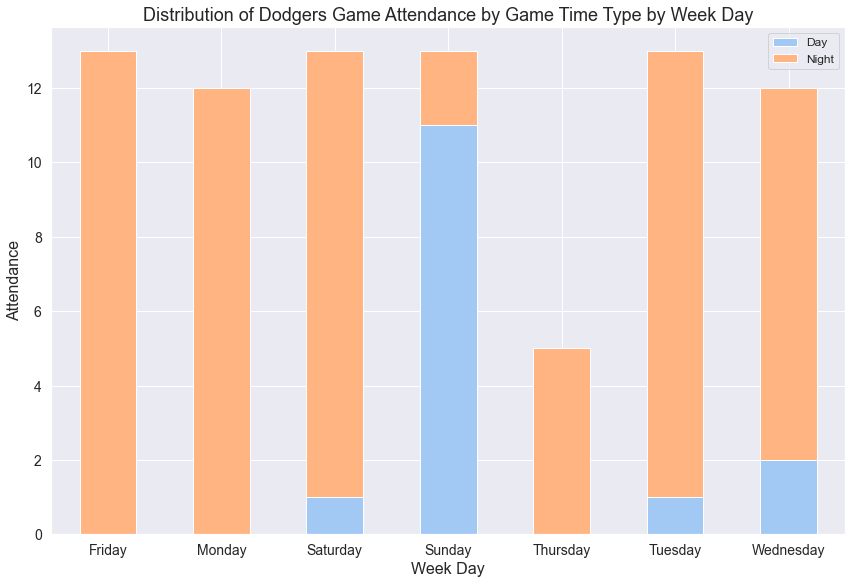

In [26]:
## Plot a bar graph to assess attendance counts by time of day (day vs. night) by week day.

## plt.figure(figsize=(16, 12))
sns.set(rc = {'figure.figsize':(12,8)})
sns.set_palette("pastel")
time = dodgers_df.day_night
dodgers_df.groupby(["day_of_week", time]).size().unstack(level=1).plot.bar(stacked=True)
## plt.bar(dodgers_df['day_night'],dodgers_df['attend'])
plt.xlabel('Week Day', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right', prop={'size': 12})
plt.tight_layout()
plt.title('Distribution of Dodgers Game Attendance by Game Time Type by Week Day', fontsize=18)
plt.show()

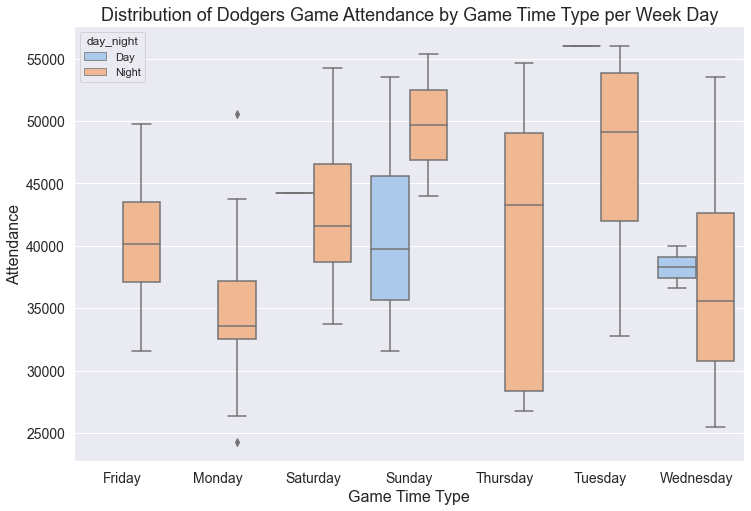

In [27]:
## Plot a box plot of the same data above (day vs. night) but now with day of week.
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'day_of_week', hue="day_night", y = 'attend', data = dodgers_df)
plt.xlabel('Game Time Type', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Game Time Type per Week Day', fontsize=18)
plt.show()

In [28]:
## Describe the data values by day of week.

dodgers_df.groupby('day_night').attend.describe().sort_values('mean')

count          mean          std      min       25%      50%  \
day_night                                                                 
Night       66.0  40868.893939  8551.130331  24312.0  33998.25  40358.0   
Day         15.0  41793.266667  7292.709084  31607.0  36175.00  39955.0   

                75%      max  
day_night                     
Night      46578.25  56000.0  
Day        46485.00  56000.0

* Clearly, there were more night time game attendances than day time, but there are significantly more night games than day games overall.
* It appears as though most day games were held on Sundays.

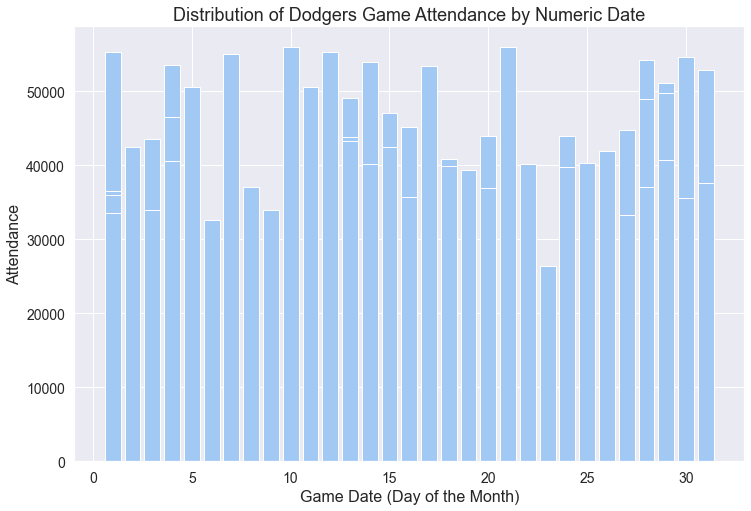

In [29]:
## Plot a bar graph to assess attendance counts per numeric date.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['day'],dodgers_df['attend'])
plt.xlabel('Game Date (Day of the Month)', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Numeric Date', fontsize=18)
plt.show()

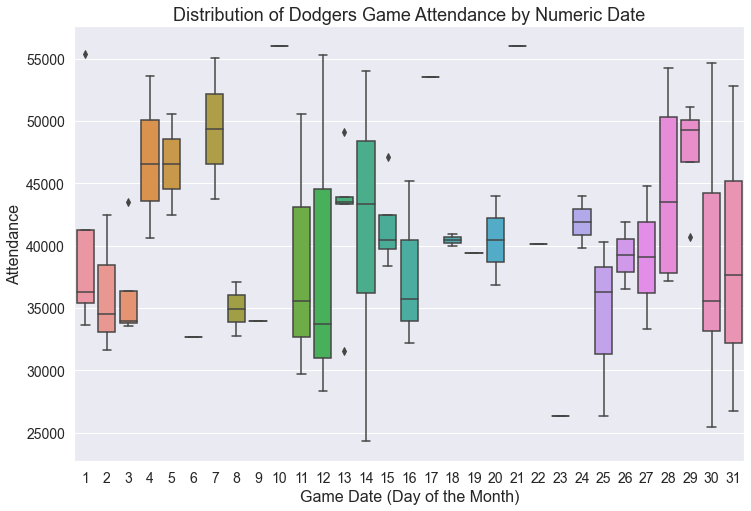

In [30]:
## Plot a box plot of the same data above (numeric date).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'day', y = 'attend', data = dodgers_df)
plt.xlabel('Game Date (Day of the Month)', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Numeric Date', fontsize=18)
plt.show()

In [31]:
## Describe the data values by numeric date.

dodgers_df.groupby('day').attend.describe().sort_values('mean')

count          mean           std      min       25%      50%       75%  \
day                                                                            
23     1.0  26376.000000           NaN  26376.0  26376.00  26376.0  26376.00   
6      1.0  32659.000000           NaN  32659.0  32659.00  32659.0  32659.00   
9      1.0  33993.000000           NaN  33993.0  33993.00  33993.0  33993.00   
25     3.0  34304.000000   7177.134595  26345.0  31314.00  36283.0  38283.50   
8      2.0  34941.500000   3029.952557  32799.0  33870.25  34941.5  36012.75   
2      3.0  36191.000000   5628.489318  31607.0  33050.00  34493.0  38483.00   
3      4.0  36243.750000   4866.277316  33540.0  33798.00  33949.0  36394.75   
16     3.0  37734.000000   6708.837157  32238.0  33996.00  35754.0  40482.00   
11     3.0  38626.333333  10741.608880  29729.0  32660.00  35591.0  43075.00   
30     5.0  38626.800000  11157.153185  25509.0  33180.00  35607.0  44217.00   
27     2.0  39056.500000   8132.435090  33306.0  36181.25  39056.5  41931.75   
31     3.0  39075.666667  13090.176864  26773.0  32197.50  37622.0  45227.00   
12     3.0  39114.000000  14257.956761  28328.0  31031.50  33735.0  44507.00   
26     2.0  39234.000000   3780.192852  36561.0  37897.50  39234.0  40570.50   
19     1.0  39383.000000           NaN  39383.0  39383.00  39383.0  39383.00   
22     1.0  40173.000000           NaN  40173.0  40173.00  40173.0  40173.00   
1      4.0  40392.750000  10059.597851  33624.0  35400.00  36294.0  41286.75   
18     2.0  40430.500000    672.458549  39955.0  40192.75  40430.5  40668.25   
20     2.0  40441.500000   5039.550030  36878.0  38659.75  40441.5  42223.25   
14     4.0  41260.500000  12636.816437  24312.0  36203.25  43358.0  48415.25   
15     5.0  41606.400000   3396.308849  38359.0  39715.00  40432.0  42449.00   
24     2.0  41909.500000   2976.212442  39805.0  40857.25  41909.5  42961.75   
13     5.0  42280.200000   6441.111371  31601.0  43309.00  43494.0  43873.00   
28     4.0  44599.250000   8396.152745  37133.0  37795.25  43511.0  50315.00   
5      2.0  46527.500000   5702.816190  42495.0  44511.25  46527.5  48543.75   
4      3.0  46925.666667   6482.099531  40619.0  43603.50  46588.0  50079.00   
29     4.0  47594.250000   4683.217937  40724.0  46745.75  49258.0  50106.50   
7      2.0  49368.500000   7998.084802  43713.0  46540.75  49368.5  52196.25   
17     2.0  53501.000000      4.242641  53498.0  53499.50  53501.0  53502.50   
10     1.0  56000.000000           NaN  56000.0  56000.00  56000.0  56000.00   
21     1.0  56000.000000           NaN  56000.0  56000.00  56000.0  56000.00   

         max  
day           
23   26376.0  
6    32659.0  
9    33993.0  
25   40284.0  
8    37084.0  
2    42473.0  
3    43537.0  
16   45210.0  
11   50559.0  
30   54621.0  
27   44807.0  
31   52832.0  
12   55279.0  
26   41907.0  
19   39383.0  
22   40173.0  
1    55359.0  
18   40906.0  
20   44005.0  
14   54014.0  
15   47077.0  
24   44014.0  
13   49124.0  
28   54242.0  
5    50560.0  
4    53570.0  
29   51137.0  
7    55024.0  
17   53504.0  
10   56000.0  
21   56000.0

* Quite a bit of variation exists in terms of what day of the month a game was and attendance.
* Overall, this doesn't appear to be overly significant information.

##### Overall, from the attendance by date section, we can ascertain the following:
* Night games, Tuesdays, and June and April had the greatest attendance as far as dates and times go.
* Given this, there likely would not need to be any work done to "bolster" attendance on those fronts, but we will continue to assess additional aspects of this data.

##### Attendance by opponent:

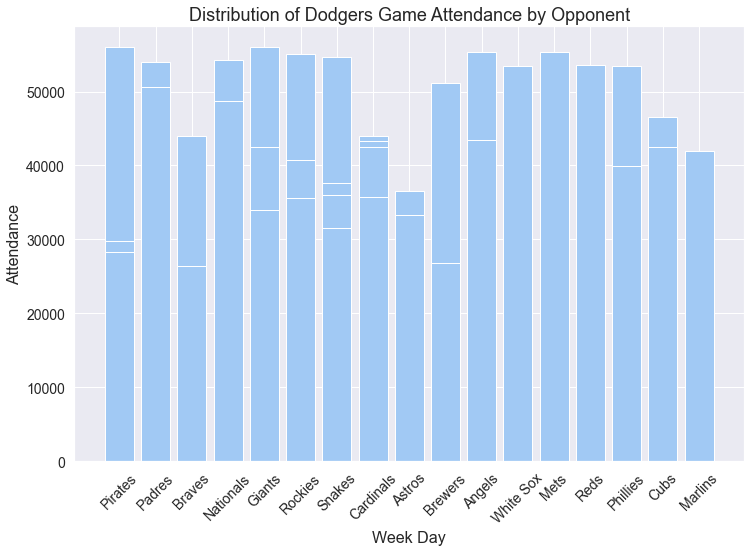

In [32]:
## Plot a bar graph to assess attendance counts relative to each opponent.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['opponent'],dodgers_df['attend'])
plt.xlabel('Week Day', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Opponent', fontsize=18)
plt.show()

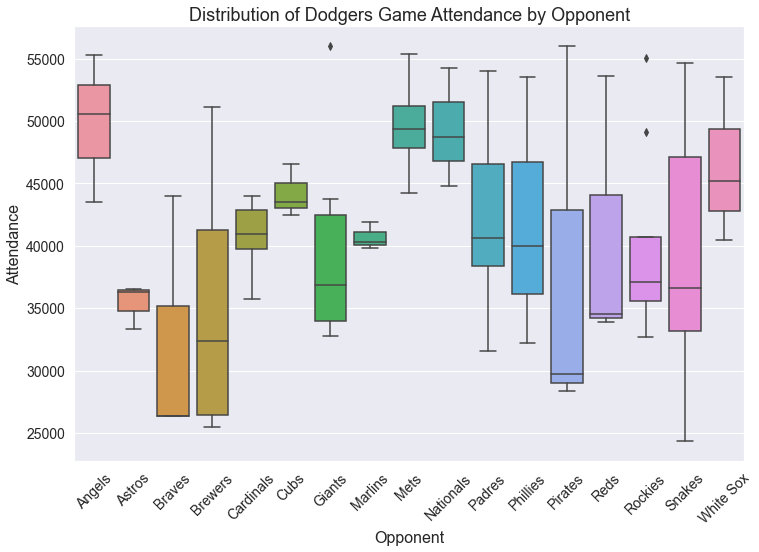

In [33]:
## Plot a box plot of the same data above (opponent games attendance).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'opponent', y = 'attend', data = dodgers_df)
plt.xlabel('Opponent', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Opponent', fontsize=18)
plt.show()

In [34]:
## Describe the data values by numeric date.

dodgers_df.groupby('opponent').attend.describe().sort_values('mean')

count          mean           std      min       25%      50%  \
opponent                                                                   
Braves       3.0  32245.000000  10192.264763  26345.0  26360.50  26376.0   
Brewers      4.0  35358.750000  11926.816127  25509.0  26457.00  32394.5   
Astros       3.0  35383.333333   1804.385306  33306.0  34794.50  36283.0   
Pirates      3.0  38019.000000  15587.750672  28328.0  29028.50  29729.0   
Giants       9.0  39296.333333   7463.633599  32799.0  33993.00  36878.0   
Snakes       9.0  39315.444444  10128.392050  24312.0  33180.00  36596.0   
Rockies      9.0  39631.222222   7557.025999  32659.0  35591.00  37084.0   
Reds         3.0  40649.000000  11194.056503  33884.0  34188.50  34493.0   
Marlins      3.0  40665.333333   1101.663439  39805.0  40044.50  40284.0   
Cardinals    7.0  40853.285714   2803.223187  35754.0  39775.00  40906.0   
Phillies     3.0  41897.000000  10762.222029  32238.0  36096.50  39955.0   
Padres       9.0  42092.222222   7431.611951  31601.0  38359.00  40619.0   
Cubs         3.0  44206.666667   2127.087759  42495.0  43016.00  43537.0   
White Sox    3.0  46382.000000   6614.339272  40432.0  42821.00  45210.0   
Nationals    3.0  49267.333333   4738.481860  44807.0  46780.00  48753.0   
Mets         4.0  49586.250000   4565.136681  44217.0  47808.75  49384.5   
Angels       3.0  49777.333333   5931.256893  43494.0  47026.50  50559.0   

                75%      max  
opponent                      
Braves     35195.00  44014.0  
Brewers    41296.25  51137.0  
Astros     36422.00  36561.0  
Pirates    42864.50  56000.0  
Giants     42473.00  56000.0  
Snakes     47077.00  54621.0  
Rockies    40724.00  55024.0  
Reds       44031.50  53570.0  
Marlins    41095.50  41907.0  
Cardinals  42879.00  44005.0  
Phillies   46726.50  53498.0  
Padres     46549.00  54014.0  
Cubs       45062.50  46588.0  
White Sox  49357.00  53504.0  
Nationals  51497.50  54242.0  
Mets       51162.00  55359.0  
Angels     52919.00  55279.0

##### Overall, from the attendance by opponent section, we can ascertain the following:
* Angels have the highest average attendance overall - this could be because Angels is also a Los Angeles team, and this would be an LA vs. LA kind of game.
* The Pirates and the Giants have the greatest overall attendance, although with greater variation/std. deviation than the Angels.

##### Attendance by weather:

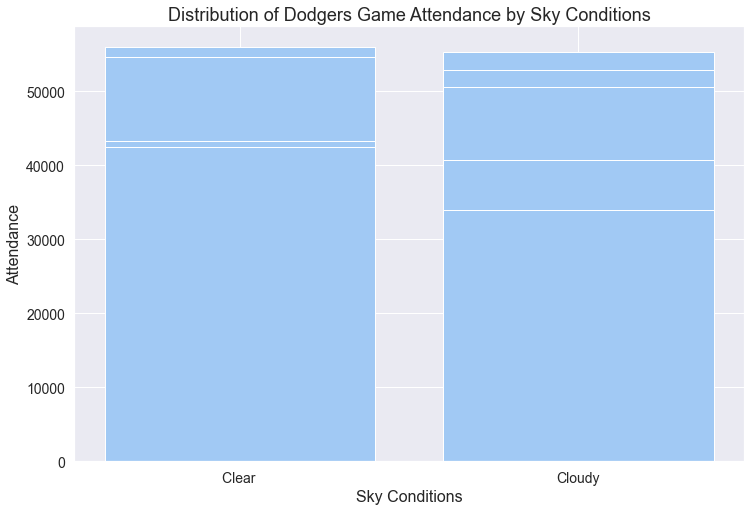

In [35]:
## Plot a bar graph to assess attendance counts relative to the skies.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['skies'],dodgers_df['attend'])
plt.xlabel('Sky Conditions', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Sky Conditions', fontsize=18)
plt.show()

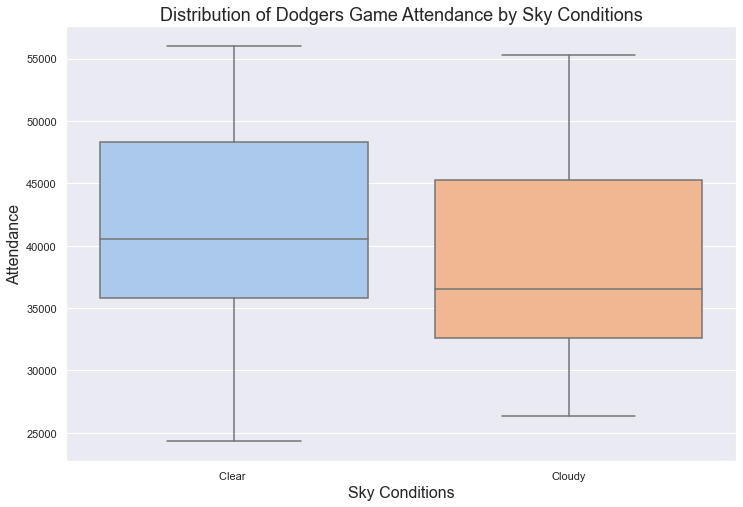

In [36]:
## Plot a box plot of the same data above (skies).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'skies', y = 'attend', data = dodgers_df)
plt.xlabel('Sky Conditions', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11)
plt.title('Distribution of Dodgers Game Attendance by Sky Conditions', fontsize=18)
plt.show()

In [37]:
## Describe the data values by numeric date.

dodgers_df.groupby('skies').attend.describe().sort_values('mean')

count          mean          std      min      25%      50%      75%  \
skies                                                                          
Cloudy   19.0  38791.315789  8896.786536  26345.0  32570.5  36561.0  45281.5   
Clear    62.0  41729.209677  8054.788459  24312.0  35813.5  40525.5  48334.0   

            max  
skies            
Cloudy  55279.0  
Clear   56000.0

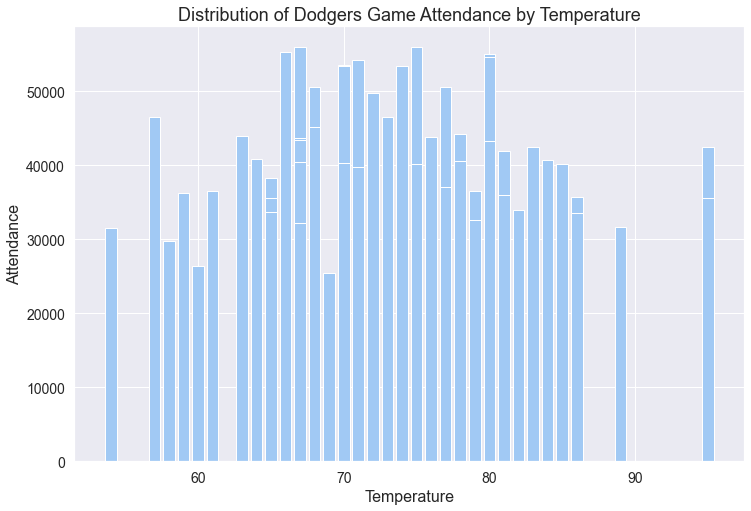

In [38]:
## Plot a bar graph to assess attendance counts relative to the temp.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['temp'],dodgers_df['attend'])
plt.xlabel('Temperature', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Temperature', fontsize=18)
plt.show()

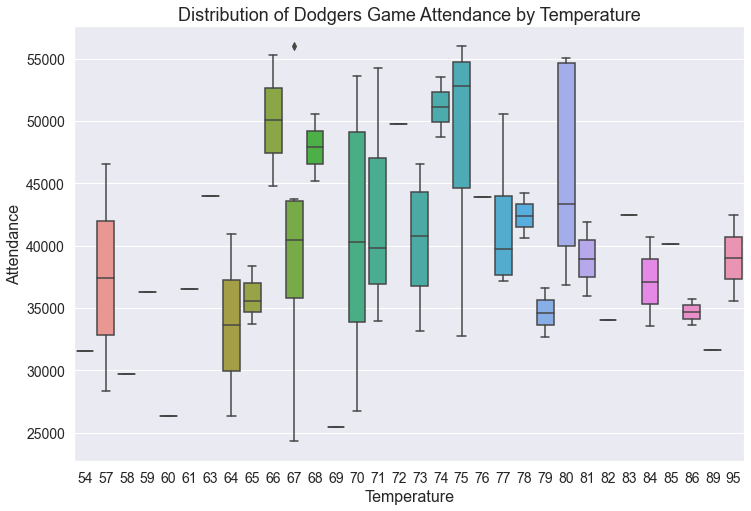

In [39]:
## Plot a box plot of the same data above (temp).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'temp', y = 'attend', data = dodgers_df)
plt.xlabel('Temperature', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Temperature', fontsize=18)
plt.show()

In [40]:
## Describe the data values by numeric date.

dodgers_df.groupby('temp').attend.describe().sort_values('mean')

count          mean           std      min       25%      50%       75%  \
temp                                                                            
69      1.0  25509.000000           NaN  25509.0  25509.00  25509.0  25509.00   
60      1.0  26376.000000           NaN  26376.0  26376.00  26376.0  26376.00   
58      1.0  29729.000000           NaN  29729.0  29729.00  29729.0  29729.00   
54      1.0  31601.000000           NaN  31601.0  31601.00  31601.0  31601.00   
89      1.0  31607.000000           NaN  31607.0  31607.00  31607.0  31607.00   
64      2.0  33625.500000  10296.181841  26345.0  29985.25  33625.5  37265.75   
82      1.0  34014.000000           NaN  34014.0  34014.00  34014.0  34014.00   
79      2.0  34627.500000   2783.879398  32659.0  33643.25  34627.5  35611.75   
86      2.0  34689.000000   1506.137444  33624.0  34156.50  34689.0  35221.50   
65      3.0  35895.000000   2326.941340  33735.0  34663.00  35591.0  36975.00   
59      1.0  36283.000000           NaN  36283.0  36283.00  36283.0  36283.00   
61      1.0  36561.000000           NaN  36561.0  36561.00  36561.0  36561.00   
84      3.0  37116.000000   3592.106903  33540.0  35312.00  37084.0  38904.00   
57      2.0  37438.500000  12884.192660  28328.0  32883.25  37438.5  41993.75   
81      2.0  38949.500000   4182.536611  35992.0  37470.75  38949.5  40428.25   
95      2.0  39028.000000   4838.024597  35607.0  37317.50  39028.0  40738.50   
67      7.0  39938.857143   9907.047465  24312.0  35810.50  40432.0  43603.50   
85      1.0  40167.000000           NaN  40167.0  40167.00  40167.0  40167.00   
73      4.0  40330.250000   5942.067787  33180.0  36807.00  40776.5  44299.75   
70      9.0  41334.333333   9818.506289  26773.0  33884.00  40284.0  49124.00   
77      5.0  41807.000000   5594.264429  37133.0  37622.00  39715.0  44005.00   
78      2.0  42418.000000   2544.170199  40619.0  41518.50  42418.0  43317.50   
83      2.0  42484.000000     15.556349  42473.0  42478.50  42484.0  42489.50   
71      3.0  42680.000000  10426.155523  33993.0  36899.00  39805.0  47023.50   
76      1.0  43873.000000           NaN  43873.0  43873.00  43873.0  43873.00   
63      1.0  44014.000000           NaN  44014.0  44014.00  44014.0  44014.00   
80      5.0  45957.400000   8407.430244  36878.0  39955.00  43309.0  54621.00   
68      2.0  47884.500000   3782.314173  45210.0  46547.25  47884.5  49221.75   
75      7.0  48597.571429   8836.628559  32799.0  44589.50  52832.0  54686.50   
72      1.0  49763.000000           NaN  49763.0  49763.00  49763.0  49763.00   
66      2.0  50043.000000   7404.822213  44807.0  47425.00  50043.0  52661.00   
74      3.0  51131.333333   2375.505069  48753.0  49945.00  51137.0  52320.50   

          max  
temp           
69    25509.0  
60    26376.0  
58    29729.0  
54    31601.0  
89    31607.0  
64    40906.0  
82    34014.0  
79    36596.0  
86    35754.0  
65    38359.0  
59    36283.0  
61    36561.0  
84    40724.0  
57    46549.0  
81    41907.0  
95    42449.0  
67    56000.0  
85    40167.0  
73    46588.0  
70    53570.0  
77    50560.0  
78    44217.0  
83    42495.0  
71    54242.0  
76    43873.0  
63    44014.0  
80    55024.0  
68    50559.0  
75    56000.0  
72    49763.0  
66    55279.0  
74    53504.0

##### Overall, from the attendance by weather section, we can ascertain the following:
* Not a huge difference in attendance per sky condition.                                                
* Not a ton of overall variation in temperatures (from 54 to 95), and given this is LA with temperatures being pretty fair overall, it does not appear that this may impact attendance significantly, although, we can see that the concetration of game attendance based on temp was between high 50s and high 80s.

##### Attendance by promotional items:

For this section, I am considering cap giveaway, shirt giveaway, bobblehead giveaway, and fireworks part of promo items. I realize fireworks aren't truly a promo item, but I felt this was the best "section" to complete the firework analysis in.

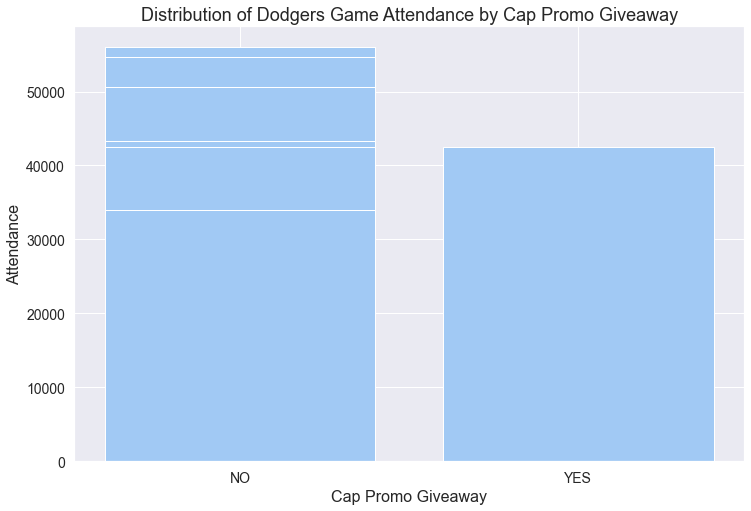

In [41]:
## Plot a bar graph to assess attendance counts relative to cap giveaways.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['cap'],dodgers_df['attend'])
plt.xlabel('Cap Promo Giveaway', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Cap Promo Giveaway', fontsize=18)
plt.show()

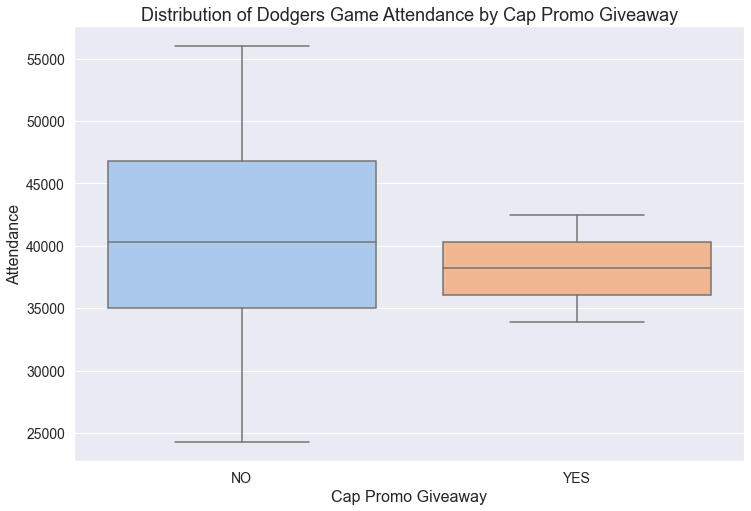

In [42]:
## Plot a box plot of the same data above (temp).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'cap', y = 'attend', data = dodgers_df)
plt.xlabel('Cap Promo Giveaway', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Cap Promo Giveaway', fontsize=18)
plt.show()

In [43]:
## Describe the data values by numeric date.

dodgers_df.groupby('cap').attend.describe().sort_values('mean')

count          mean          std      min       25%      50%       75%  \
cap                                                                           
YES    2.0  38189.500000  6088.896493  33884.0  36036.75  38189.5  40342.25   
NO    79.0  41112.240506  8362.151645  24312.0  35042.00  40284.0  46832.50   

         max  
cap           
YES  42495.0  
NO   56000.0

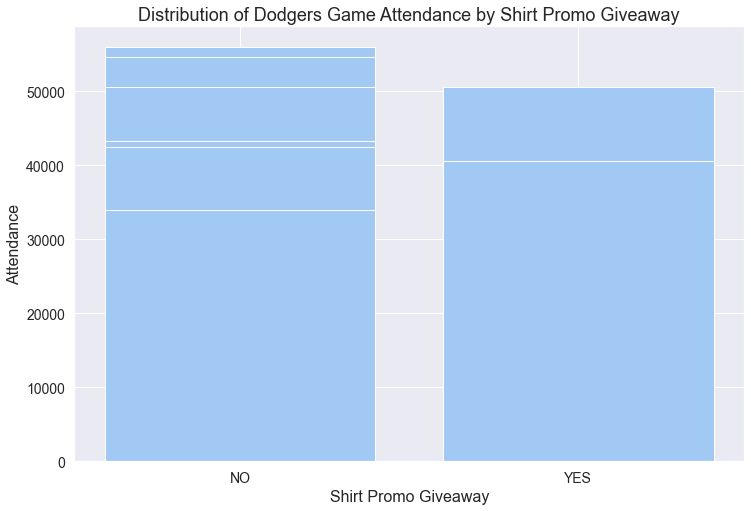

In [44]:
## Plot a bar graph to assess attendance counts relative to shirt giveaways.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['shirt'],dodgers_df['attend'])
plt.xlabel('Shirt Promo Giveaway', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Shirt Promo Giveaway', fontsize=18)
plt.show()

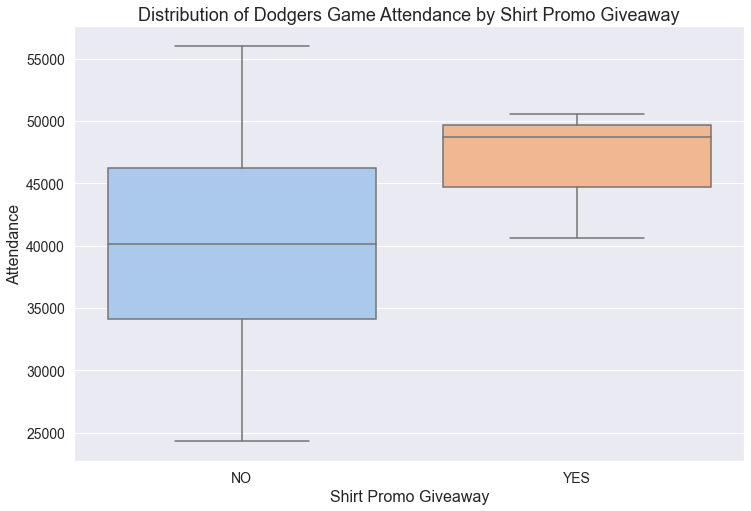

In [45]:
## Plot a box plot of the same data above (temp).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'shirt', y = 'attend', data = dodgers_df)
plt.xlabel('Shirt Promo Giveaway', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Shirt Promo Giveaway', fontsize=18)
plt.show()

In [46]:
## Describe the data values by numeric date.

dodgers_df.groupby('shirt').attend.describe().sort_values('mean')

count          mean          std      min       25%      50%       75%  \
shirt                                                                           
NO      78.0  40824.551282  8338.638979  24312.0  34133.75  40170.0  46214.25   
YES      3.0  46643.666667  5295.079351  40619.0  44686.00  48753.0  49656.00   

           max  
shirt           
NO     56000.0  
YES    50559.0

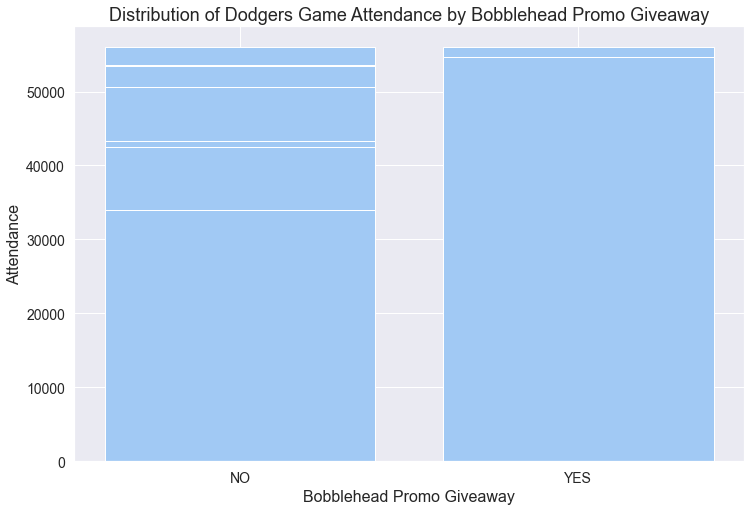

In [47]:
## Plot a bar graph to assess attendance counts relative to bobblehead giveaways.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['bobblehead'],dodgers_df['attend'])
plt.xlabel('Bobblehead Promo Giveaway', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Bobblehead Promo Giveaway', fontsize=18)
plt.show()

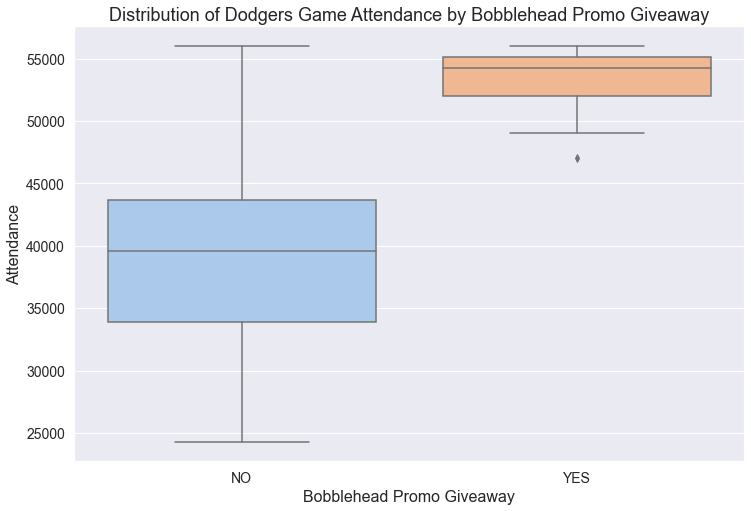

In [48]:
## Plot a box plot of the same data above (temp).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'bobblehead', y = 'attend', data = dodgers_df)
plt.xlabel('Bobblehead Promo Giveaway', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Bobblehead Promo Giveaway', fontsize=18)
plt.show()

In [49]:
## Describe the data values by numeric date.

dodgers_df.groupby('bobblehead').attend.describe().sort_values('mean')

count          mean          std      min       25%      50%  \
bobblehead                                                                 
NO           70.0  39137.928571  7182.487368  24312.0  33911.25  39549.0   
YES          11.0  53144.636364  2887.153279  47077.0  51984.50  54242.0   

                75%      max  
bobblehead                    
NO          43669.0  56000.0  
YES         55151.5  56000.0

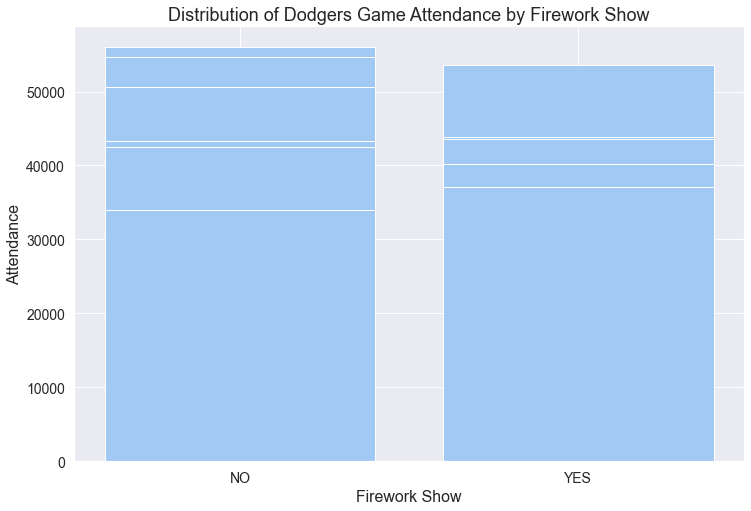

In [50]:
## Plot a bar graph to assess attendance counts relative to fireworks.
plt.figure(figsize=(12, 8))
plt.bar(dodgers_df['fireworks'],dodgers_df['attend'])
plt.xlabel('Firework Show', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Firework Show', fontsize=18)
plt.show()

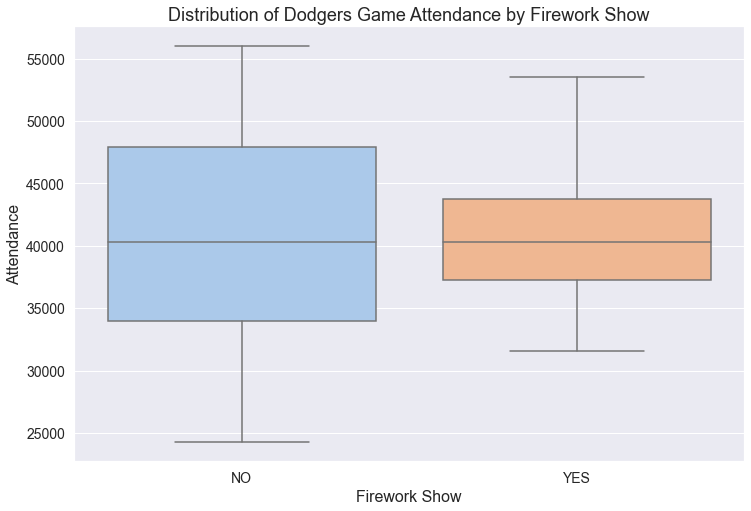

In [51]:
## Plot a box plot of the same data above (temp).
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'fireworks', y = 'attend', data = dodgers_df)
plt.xlabel('Firework Show', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Dodgers Game Attendance by Firework Show', fontsize=18)
plt.show()

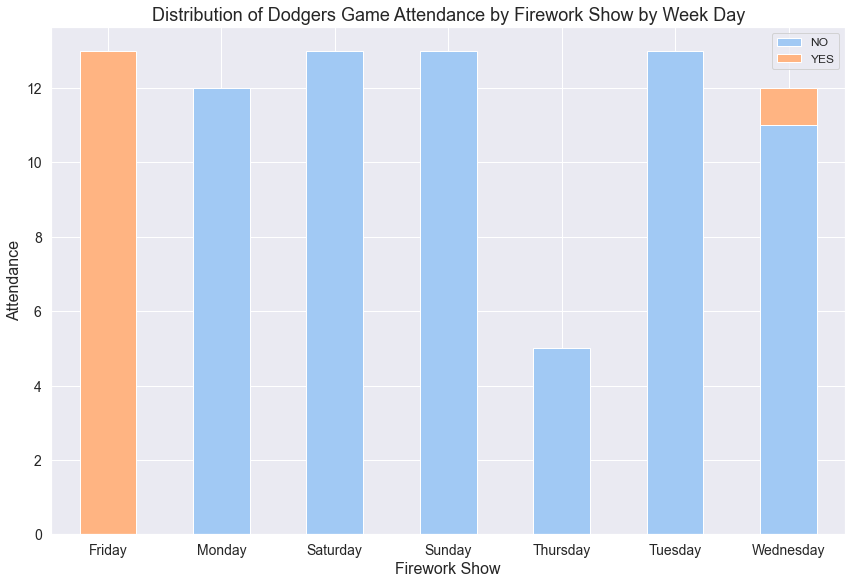

In [52]:
## Fireworks and week day - assess when fireworks are most commonly done.
## Bar Chart.

sns.set(rc = {'figure.figsize':(12,8)})
sns.set_palette("pastel")
fireworks = dodgers_df.fireworks
dodgers_df.groupby(["day_of_week", fireworks]).size().unstack(level=1).plot.bar(stacked=True)
## plt.bar(dodgers_df['day_night'],dodgers_df['attend'])
plt.xlabel('Firework Show', fontsize=16)
plt.ylabel('Attendance', fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right', prop={'size': 12})
plt.tight_layout()
plt.title('Distribution of Dodgers Game Attendance by Firework Show by Week Day', fontsize=18)
plt.show()

In [53]:
## Describe the data values by numeric date.

dodgers_df.groupby('fireworks').attend.describe().sort_values('mean')

count          mean          std      min       25%      50%  \
fireworks                                                                 
NO          67.0  41032.179104  8769.219806  24312.0  33938.50  40284.0   
YES         14.0  41077.857143  5768.351782  31601.0  37255.25  40299.5   

               75%      max  
fireworks                    
NO         47915.0  56000.0  
YES        43789.0  53570.0

##### Overall, from the attendance by promotion section, we can ascertain the following:
* It does not appear that promotional items really impact attendance numbers, however, see my notes below on class balances.
* It appears as though firework show occur predominantly on Fridays - and given that Fridays do not have the greatest overall attendance, it does not seem that fireworks would influence that.

A note on class balances:

There is significant class imbalance for the categorical variables of 'skies', 'cap', 'shirt', 'fireworks' and 'bobblehead'. In these instances, one value holds the majority, which would need to be handled when going into regression modeling. (Most of these categories are promotional items - it seems promotional items don't have a large impact on attendance, but due to class imbalance, this may be tough to ascertain until later steps).


#### 7. Targets and Features

The target variable here is attendance, as that is the variable that we are trying to influence based on the other variables, which are our features.

In [54]:
## Set up as targets/features to be used later for predictive measures.

target = dodgers_df[['attend']]
features = dodgers_df[['month','day','day_of_week','day_night','opponent','temp','skies','cap','shirt','fireworks','bobblehead']]

In [55]:
## View the target dataframe.

target

attend
0    56000
1    29729
2    28328
3    31601
4    46549
..     ...
76   40724
77   35607
78   33624
79   42473
80   34014

[81 rows x 1 columns]

In [56]:
## View the features dataframe.

features

month  day day_of_week day_night opponent  temp   skies cap shirt  \
0    APR   10     Tuesday       Day  Pirates    67  Clear   NO    NO   
1    APR   11   Wednesday     Night  Pirates    58  Cloudy  NO    NO   
2    APR   12    Thursday     Night  Pirates    57  Cloudy  NO    NO   
3    APR   13      Friday     Night   Padres    54  Cloudy  NO    NO   
4    APR   14    Saturday     Night   Padres    57  Cloudy  NO    NO   
..   ...  ...         ...       ...      ...   ...     ...  ..   ...   
76   SEP   29    Saturday     Night  Rockies    84  Cloudy  NO    NO   
77   SEP   30      Sunday       Day  Rockies    95  Clear   NO    NO   
78   OCT    1      Monday     Night   Giants    86  Clear   NO    NO   
79   OCT    2     Tuesday     Night   Giants    83  Clear   NO    NO   
80   OCT    3   Wednesday     Night   Giants    82  Cloudy  NO    NO   

   fireworks bobblehead  
0         NO         NO  
1         NO         NO  
2         NO         NO  
3        YES         NO  
4         NO         NO  
..       ...        ...  
76        NO         NO  
77        NO         NO  
78        NO         NO  
79        NO         NO  
80        NO         NO  

[81 rows x 11 columns]

#### 8. Analysis: Relationships & Predictives

In [57]:
## Import necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import yellowbrick
import csv

## Used to split data into training/testing sets.
from sklearn.model_selection import train_test_split

## Used for plotting confusion matrices.
from sklearn.metrics import plot_confusion_matrix

## Used for evaluation metrics.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Scalers.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler                   

## One-hot encoder.
from sklearn.preprocessing import OneHotEncoder

## PCA library.
from sklearn.decomposition import PCA

## Linear regression.
from sklearn.linear_model import LinearRegression

##### Assessing variable relationships:

Before continuing on to modeling, it is imperative to further explore feature correlation to ensure that no multi-collinearity may encroach upon further analysis. In other words,it is important to first identify which features may have an effect on each other versus those that merely impact the target variable. Doing so will allow for the removal of highly correlated variables, so that those variables will not impact the end result of our modeling (if they did, this may lead to inaccurate output, and thus inaccurate interpretation).

Also, because the correlation heatmap results were not so cut-and-dried from before, investigating further is paramount.

I am going to try a bit of a different approach here, using LabelEncoder() to obtain dummy variables.

In [58]:
## Month, day_of_week, opponent, skies, day_night, cap, shirt, fireworks, bobblehead
cat_cols = ['month','day_of_week','opponent','skies','day_night','cap','shirt','fireworks','bobblehead']

## Turning categories into their numerical counterparts using LabelEncoder
for var in cat_cols:
    number = LabelEncoder()
    dodgers_df[var+"cat"] = number.fit_transform(dodgers_df[var].astype('str'))

In [59]:
dodgers_df.head()

month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

   ... bobblehead monthcat  day_of_weekcat  opponentcat  skiescat  \
0  ...         NO        0               5           12         0   
1  ...         NO        0               6           12         1   
2  ...         NO        0               4           12         1   
3  ...         NO        0               0           10         1   
4  ...         NO        0               2           10         1   

   day_nightcat  capcat  shirtcat  fireworkscat  bobbleheadcat  
0             0       0         0             0              0  
1             1       0         0             0              0  
2             1       0         0             0              0  
3             1       0         0             1              0  
4             1       0         0             0              0  

[5 rows x 21 columns]

In [60]:
## Correlations.
corr = dodgers_df.corr()
corr.style.background_gradient(cmap='coolwarm')

The variables with significant, positive correlations include:
* attend & bobbleheadcat are moderately highly correlated (0.581895)
* monthcat & temp are moderately correlated (0.470073) - this makes sense, as weather tends to be correlated with the time of year.

Overall, not too many variables are correlated with one another. Additionally, there are not many extremely strong correlations either. 

This is likely indicative of low multi-collinearity, which is good for future analysis purposes.

##### Multiple Linear Regression:

In order to take a look at what potential predictors may influence the attend target variable, I will first utilize a linear regression model.

Regression Analysis, a statistical technique, is used to evaluate the relationship between two or more variables. Regression analysis helps organizations to understand what their data points represent and to use them accordingly with the help of business analytical techniques in order to do better decision-making. It is often used for forecasting and predictions - specifically when it comes to questions surrounding population increases or forecasting. Given this, I felt it was the best choice to assessing what impact attendance numbers (population) at MLB Dodgers games. And, given that this is not a classification problem, classification methods will not be applicable.

In [61]:
## Split the data.
x = features
y = target

In [62]:
## Training and test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [63]:
## View the shape.
print(x_train.shape)
print(x_test.shape)

(56, 11)
(25, 11)


In [64]:
## Split columns into numerical and categorical training and testing sets.
xtrain_num = x_train[x_train.columns[x_train.dtypes != 'category']]
xtest_num = x_test[x_train.columns[x_train.dtypes != 'category']]
xtrain_cat = x_train[x_train.columns[x_train.dtypes == 'category']]
xtest_cat = x_test[x_train.columns[x_train.dtypes == 'category']]

In [65]:
## Convert categorical variables to dummy.
## Use the OneHotEncoder to complete this step.
encoder = OneHotEncoder(handle_unknown = 'ignore')

## Fit and transform to the encoder.
xtrain_encoder = encoder.fit_transform(xtrain_cat)
xtest_encoder = encoder.transform(xtest_cat)

print(xtrain_encoder.shape)
print(xtest_encoder.shape)

(56, 43)
(25, 43)


In [66]:
## Concatenate numerical and encoded (categorical dummy) features.
xtrain_num.reset_index(drop=True, inplace=True)
xtest_num.reset_index(drop=True, inplace=True)
xtrain_final = pd.concat([xtrain_num, pd.DataFrame(xtrain_encoder.toarray())], axis = 1)
xtest_final = pd.concat([xtest_num, pd.DataFrame(xtest_encoder.toarray())], axis = 1)

## View shape.
print(xtrain_final.shape)   
print(xtest_final.shape)

(56, 45)
(25, 45)


In [67]:
## Fit a Linear Regression model to the training set.

## Set up the model name.
linreg_model = LinearRegression()

## Fit the model.
linreg_model.fit(xtrain_final, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [68]:
## Prediction model.
lr_model_predict = linreg_model.predict(xtest_final)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [69]:
## R2 and RMSE.
print(r2_score(y_test, lr_model_predict))
print(np.sqrt(mean_squared_error(y_test, lr_model_predict)))

-0.6877759623769122
9732.429541442474


* For the linear model:
    * The R2 value is -0.4570594687380729 - a negative value, which means that the model actually performed more poorly than the mean value; in other words, the regression line is worse than using the mean value (average line).
    * The RMSE value is 10068.25665734067.

Because we have quite a few predictor variables (and the above linear regression model did not work well on our dataset), I will want to use PCA in my linear regression - this is because PCA takes advantage of multi-collinearity and combines the highly correlated variables into a set of uncorrelated variables. Therefore, PCA can effectively eliminate multi-collinearity between features - which is what I was referencing as being a potential issue earlier within this assignment.

In [70]:
## Fit and transform the training features with a PCA so that 90% of the variance is retained.

## Create scaler.
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain_final)

## Create PCA to retain 90% of variance.
pca = PCA(n_components = 0.9)
xtrain_pca = pca.fit_transform(xtrain_scaled)

## View shape.
print(xtrain_pca.shape)

(56, 21)


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [71]:
## Transform the features.
xtest_scaled = scaler.transform(xtest_final)
xtest_pca = pca.transform(xtest_scaled)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [72]:
## Set up the PCA lin reg model name.
linreg_model2 = LinearRegression()

## Fit the model.
linreg_model2.fit(xtrain_pca, y_train)

LinearRegression()

In [73]:
## Prediction model.
lr_model_predict2 = linreg_model2.predict(xtest_pca)

In [74]:
## R2 and RMSE.
print(r2_score(y_test, lr_model_predict2))
print(np.sqrt(mean_squared_error(y_test, lr_model_predict2)))

-0.033966052147937464
7617.579749874812


* For the linear model utilizing PCA:
    * The R2 value is 0.5524292484760389 - while this is not overly strong (55% of the data fits the regression model) it is significantly better than our linear model without PCA.
    * The RMSE value is 5778.956763521951.

In an endeavor to further improve upon the linear regression, I will take some additional measures below.

##### Ridge Regression:

Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task. (And this method is often used for regularization purposes).

In [75]:
## Import libraries.
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import arange
from sklearn.model_selection import GridSearchCV

In [76]:
## Define model.
rr = Ridge()

In [77]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(rr, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(xtrain_final, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -5482.267
Config: {'alpha': 0.99}


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The Mean Absolute Error indicates that, based upon the predictive power of this Ridge Regression model, the difference between the "predicted" attendance per game and actual attendance was about 5,849 people.

##### Which Features Are the Best Predictors?

While the above indicates to us the success of a couple of models, it does not necessarily tell us which features are most impactful. And, unfortunately, overall, the models I ran were not the most successful in predicting attendance outcomes based on the present features. Below, I do some additional work to figure out more here.

In [78]:
## Cat columns.
cat_cols = ['month','day_of_week','opponent','skies','day_night','cap','shirt','fireworks','bobblehead']

## LabelEncoder
for var in cat_cols:
    number = LabelEncoder()
    dodgers_df[var+"cat"] = number.fit_transform(dodgers_df[var].astype('str'))

In [79]:
dodgers_df.head()

month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

   ... bobblehead monthcat  day_of_weekcat  opponentcat  skiescat  \
0  ...         NO        0               5           12         0   
1  ...         NO        0               6           12         1   
2  ...         NO        0               4           12         1   
3  ...         NO        0               0           10         1   
4  ...         NO        0               2           10         1   

   day_nightcat  capcat  shirtcat  fireworkscat  bobbleheadcat  
0             0       0         0             0              0  
1             1       0         0             0              0  
2             1       0         0             0              0  
3             1       0         0             1              0  
4             1       0         0             0              0  

[5 rows x 21 columns]

In [80]:
dodgers_df.columns

Index(['month', 'day', 'attend', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead', 'monthcat',
       'day_of_weekcat', 'opponentcat', 'skiescat', 'day_nightcat', 'capcat',
       'shirtcat', 'fireworkscat', 'bobbleheadcat'],
      dtype='object')

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
## Features: all variables except for attend.
x=dodgers_df[['day', 'temp', 'monthcat',
       'day_of_weekcat', 'opponentcat', 'skiescat', 'day_nightcat', 'capcat',
       'shirtcat', 'fireworkscat', 'bobbleheadcat']]
## Target variable:attend
y=dodgers_df['attend']

In [82]:
## Calculating the VIF score for each feature to determine if collinearity exists among variable
## Finding values with large absolute values greater than 5
## Function taken from https://medium.com/analytics-vidhya/feature-selection-techniques-2614b3b7efcd
def cal_vif(x):
    #threshold for VIF score
    thresh = 5
    output = pd.DataFrame()
    #number of columns
    k = x.shape[1]
    #calculate the VIF for the values in each column in the features
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ',i)
        print(vif)
        #determine the feature with max VIF
        a = np.argmax(vif)
        print('Max vif is for variable no : ',a)
        #if max is not less than the threshold of 5.0, break and keep looking
        if(vif[a]<=thresh):
            break
        #else drop features and keep searching ... recursive
        if(i==1):
            output=x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j)for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)


In [83]:
selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[4.204157302839592, 24.037326727892182, 4.012861448430554, 4.485534573577978, 4.883858606722919, 1.5021331968598226, 5.8784908876656425, 1.1407616129869544, 1.0778374104984938, 1.824806359413995, 1.4301918351334046]
Max vif is for variable no :  1
Iteration no  2
[3.0015542606874606, 2.7751701840073957, 3.496116021265396, 3.261408702698615, 1.4981386856252652, 4.984141686719416, 1.0748283349011185, 1.060083034189159, 1.7996423834768782, 1.4206154184210529]
Max vif is for variable no :  5


day  monthcat  day_of_weekcat  opponentcat  skiescat  day_nightcat  capcat  \
0   10         0               5           12         0             0       0   
1   11         0               6           12         1             1       0   
2   12         0               4           12         1             1       0   
3   13         0               0           10         1             1       0   
4   14         0               2           10         1             1       0   

   shirtcat  fireworkscat  bobbleheadcat  
0         0             0              0  
1         0             0              0  
2         0             0              0  
3         0             1              0  
4         0             0              0

From this VIF portion, we can see the following:
* Removed/dropped variables which had collinearity with each other. 
* This will allow for unique and independent features, and for less variable interference.
* The following variables/features were dropped: 

Through these iterations, the following feature was dropped: temp.
* So, it would appear that temp is not a useful feature in determining attendance.

#### 8. Summary of results and conclusion. 

Overall, from this assignment, I wanted to figure out which variables would be most impactful on Dodger game attendance. The following are my overall conclusions - which include discussion of findings, limitations, and future recommendations. 

##### Final verdicts:

* From some of my EDA steps, it was difficult to say what was truly meaningful in terms of relationships.
* From a promotional item standpoint, it appears as though bobbleheads were the most popular promo item based on the correlation EDA findings.
* Temperature or skies likely does not impact attendance, based on the EDA and model findings.


##### Limitations:
* I likely could have taken a simpler route - I do feel as though I overcomplicated some steps, but that is probably due to the fact that I often felt as though my results and outcomes were inconclusive.
* I had a difficult time attempting to do Correlation Ratio work as well as attempting to use SMOTE methodology on the features - I am familiar with using SMOTE for the target variable, but attempting some different SMOTE methods on the features data did not prove fruitful, and if anything, seemed to make matters worse.

##### Future ideas:
* More data would be helpful - maybe from a period of a variety of years. This would help bolster some of the variable classes (particularly the promo item variable classes).
* Applying a SMOTE type methodology may help prepare the data a bit more, thus yielding better model results.

##### My recommendations for improved attendance:

* Given that bobbleheads were the most popular promo item, I would recommend including those more frequently as an item giveaway.
* Given that the days with highest attendance are Tuesdays (overall) and Thursdays (average), perhaps the combination of Thursdays plus bobblehead giveaways would results in an even greater increase in attendance on those days.
* Given that the greatest opponent attendances occurred during the Angels, the Pirates, and the Giants games (which makes sense, given that the Angels is another LA team and the Giants is considered a direct Dodgers rival), pairing more bobblehead promo giveaways with those games may prove fruitful for increasing attendance.
* Overall, I believe that more analysis work needs to take place to truly pinpoint the best features for prediction, or the best interaction of features for prediction.